#  Cellular Network Performance Modeling Project

##  Overview

In the telecommunications industry, maintaining high-quality cellular network performance is critical for customer satisfaction, retention, and operational efficiency. This project uses a real-world dataset containing geolocated signal measurements and network performance metrics to analyze and model key indicators of network health. By combining regression and classification approaches, the aim is to evaluate and predict network performance and classify zones based on service quality.

---

## Problem Statement

Mobile network operators face challenges in ensuring consistent service quality across regions. Variability in signal strength, data throughput, and latency can result in user dissatisfaction, especially in high-traffic or underserved areas. There is a need to:

- Accurately predict network performance metrics at any given location and time.
- Identify and classify zones by quality of service.
- Predict the network type (3G, 4G, 5G, etc.) based on environmental and signal parameters.

---

##  Project Objectives

### Primary Objectives

1. **Regression**:
   - Predict continuous performance metrics:
     - Signal Strength (dBm)
     - Signal Quality (%)
     - Data Throughput (Mbps)
     - Latency (ms)

2. **Classification**:
   - Classify zones into service quality levels: **Good**, **Moderate**, or **Poor**.
   - Predict the **network type** (e.g., 3G, 4G, 5G) based on observed signal and performance data.

3. **Geospatial Analysis**:
   - Map regions with poor or inconsistent network coverage.
   - Provide data-driven recommendations for infrastructure improvements.

###  Secondary Objectives

- Compare the reliability of different signal measurement tools (BB60C, srsRAN, BladeRFxA9).
- Understand correlation between geographic, temporal, and signal-related factors.

---

##  Metrics of Success

###  Technical Success Metrics

| Task | Metrics |
|------|---------|
| Regression (Signal/Throughput/Latency) | RMSE, MAE, R² |
| Zone Classification | Accuracy, Precision, Recall, F1-Score |
| Network Type Classification | Accuracy, Confusion Matrix, ROC-AUC |
| Feature Importance | Gain-based or SHAP value insights |

###  Business Success Metrics

| Goal | Indicator |
|------|-----------|
| Improved coverage planning | Identifying underserved zones with >90% accuracy |
| Network type predictability | >80% accuracy in predicting network types |
| Targeted optimization | Actionable insights for at least 3 key zones |
| Scalability | Model generalizes well to new geolocations |


#  Data Understanding – Cellular Network Performance Project

##  Dataset Overview

This dataset contains signal quality measurements from various geographic locations and cellular network types. The goal is to assess and model the quality of service across different network types and environments.

---

##  Key Features

| Column Name        | Description |
|--------------------|-------------|
| `latitude`         | Latitude coordinate where signal was measured |
| `longitude`        | Longitude coordinate where signal was measured |
| `timestamp`        | Time of measurement |
| `tool`             | Measurement tool used (e.g., BB60C, srsRAN, BladeRFxA9) |
| `network_type`     | Type of mobile network (3G, 4G, LTE, 5G) |
| `locality`         | Area classification (Urban, Suburban, Rural) |
| `signal_strength`  | Signal power in dBm |
| `signal_quality`   | Quality of the signal (percentage) |
| `data_throughput`  | Data transmission speed (Mbps) |
| `latency`          | Network delay in milliseconds (ms) |

---





# Exploring the dataset


In [71]:
# Importing the necessary libraries
#Data manipulation
import pandas as pd
import numpy as np

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

# Models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report,accuracy_score,f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv('signal_metrics.csv')
df

Timestamp           Locality   Latitude  Longitude  \
0      2023-05-05 12:50:40.000000           Anisabad  25.599109  85.137355   
1      2023-05-05 12:53:47.210173        Fraser Road  25.433286  85.070053   
2      2023-05-05 12:56:54.420346  Boring Canal Road  25.498809  85.211371   
3      2023-05-05 13:00:01.630519            Danapur  25.735138  85.208400   
4      2023-05-05 13:03:08.840692    Phulwari Sharif  25.538556  85.159860   
...                           ...                ...        ...        ...   
16824  2023-06-10 23:44:23.950552        Pataliputra  25.542846  85.129611   
16825  2023-06-10 23:47:31.160725  Boring Canal Road  25.724624  85.233365   
16826  2023-06-10 23:50:38.370898        Boring Road  25.574020  85.030036   
16827  2023-06-10 23:53:45.581071        Boring Road  25.619325  85.183155   
16828  2023-06-10 23:56:52.791244     Rajendra Nagar  25.682516  85.264655   

       Signal Strength (dBm)  Signal Quality (%)  Data Throughput (Mbps)  \
0                 -84.274113                 0.0                1.863890   
1                 -97.653121                 0.0                5.132296   
2                 -87.046134                 0.0                1.176985   
3                 -94.143159                 0.0               68.596932   
4                 -94.564765                 0.0               38.292038   
...                      ...                 ...                     ...   
16824             -92.024221                 0.0                3.720856   
16825             -87.579509                 0.0                2.117080   
16826             -90.451396                 0.0               72.870842   
16827             -85.661814                 0.0                2.482843   
16828             -93.228967                 0.0                1.638291   

       Latency (ms) Network Type  BB60C Measurement (dBm)  \
0        129.122914           3G                 0.000000   
1         54.883606           4G               -95.810791   
2        119.598286          LTE               -91.593861   
3         46.598387           5G               -90.642773   
4         30.342828           5G               -90.489100   
...             ...          ...                      ...   
16824     53.376474           4G               -90.177947   
16825    134.458401          LTE               -87.694985   
16826     32.556578           5G               -91.098875   
16827    144.007572           3G                 0.000000   
16828    123.234570          LTE               -95.598301   

       srsRAN Measurement (dBm)  BladeRFxA9 Measurement (dBm)  
0                      0.000000                      0.000000  
1                   -105.452359                    -99.920892  
2                    -95.419482                    -87.714070  
3                   -101.895905                    -96.570698  
4                   -103.318304                    -95.102467  
...                         ...                           ...  
16824                -97.971619                    -93.362041  
16825                -92.616868                    -84.749607  
16826                -97.447725                    -87.752628  
16827                  0.000000                      0.000000  
16828                -99.438645                    -94.268015  

[16829 rows x 12 columns]

In [3]:
#Asserting the shape
df.shape

(16829, 12)

In [4]:
# Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16829 entries, 0 to 16828
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     16829 non-null  object 
 1   Locality                      16829 non-null  object 
 2   Latitude                      16829 non-null  float64
 3   Longitude                     16829 non-null  float64
 4   Signal Strength (dBm)         16829 non-null  float64
 5   Signal Quality (%)            16829 non-null  float64
 6   Data Throughput (Mbps)        16829 non-null  float64
 7   Latency (ms)                  16829 non-null  float64
 8   Network Type                  16829 non-null  object 
 9   BB60C Measurement (dBm)       16829 non-null  float64
 10  srsRAN Measurement (dBm)      16829 non-null  float64
 11  BladeRFxA9 Measurement (dBm)  16829 non-null  float64
dtypes: float64(9), object(3)
memory usage: 1.5+ MB


In [5]:
# Checking for statistical info for numerical values
df.describe().T

count        mean        std         min  \
Latitude                      16829.0   25.594796   0.089881   25.414575   
Longitude                     16829.0   85.137314   0.090095   84.957936   
Signal Strength (dBm)         16829.0  -90.072484   5.399368 -116.942267   
Signal Quality (%)            16829.0    0.000000   0.000000    0.000000   
Data Throughput (Mbps)        16829.0   16.182856  25.702734    1.000423   
Latency (ms)                  16829.0  101.313624  56.010418   10.019527   
BB60C Measurement (dBm)       16829.0  -68.820150  40.046739 -115.667514   
srsRAN Measurement (dBm)      16829.0  -74.439562  43.215204 -124.652054   
BladeRFxA9 Measurement (dBm)  16829.0  -68.819930  39.996934 -119.207545   

                                     25%         50%         75%         max  
Latitude                       25.522858   25.595383   25.667620   25.773648  
Longitude                      85.064124   85.138149   85.209504   85.316994  
Signal Strength (dBm)         -93.615962  -89.665566  -86.145491  -74.644848  
Signal Quality (%)              0.000000    0.000000    0.000000    0.000000  
Data Throughput (Mbps)          2.001749    2.997175    9.956314   99.985831  
Latency (ms)                   50.320775  100.264318  149.951112  199.991081  
BB60C Measurement (dBm)       -94.021959  -89.126942    0.000000    0.000000  
srsRAN Measurement (dBm)     -101.249987  -96.838442    0.000000    0.000000  
BladeRFxA9 Measurement (dBm)  -93.749032  -89.282746    0.000000    0.000000

In [6]:
#Checking statistical information for objects
df.describe(include=object).T

count unique                         top  freq
Timestamp     16829  16829  2023-05-05 12:50:40.000000     1
Locality      16829     20                 Fraser Road   897
Network Type  16829      4                         LTE  4224

In [7]:
#Checking for missing values
df.isnull().sum()

Timestamp                       0
Locality                        0
Latitude                        0
Longitude                       0
Signal Strength (dBm)           0
Signal Quality (%)              0
Data Throughput (Mbps)          0
Latency (ms)                    0
Network Type                    0
BB60C Measurement (dBm)         0
srsRAN Measurement (dBm)        0
BladeRFxA9 Measurement (dBm)    0
dtype: int64

In [8]:
#Checking for duplicates
df.duplicated().sum()

0

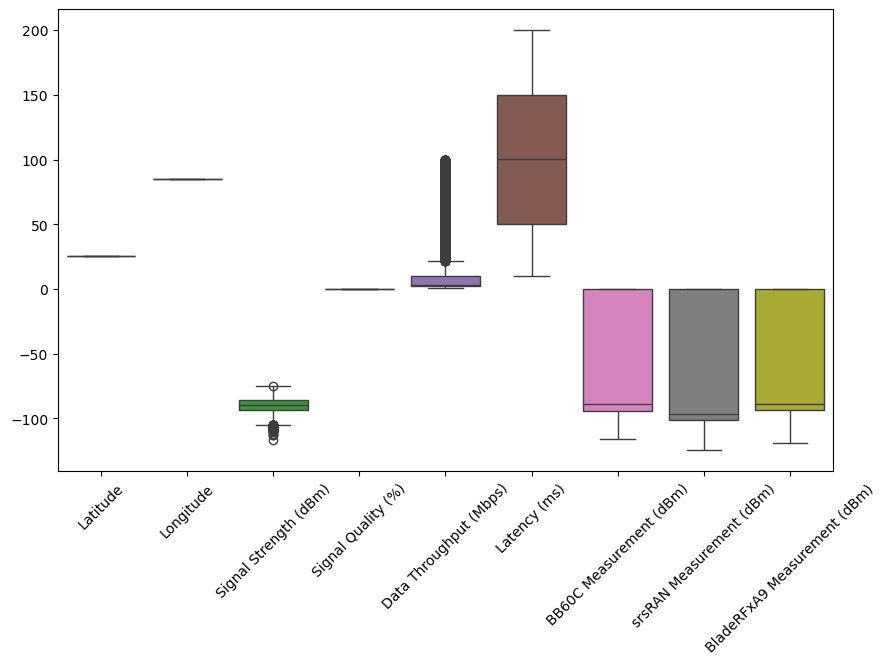

In [9]:
#Checking for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

# Data Preparation

In [10]:
# Dropping unnecessary columns
df.drop(columns=['Locality'],axis=1,inplace=True)

In [11]:
#changing column format to lower case and handling white spaces
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ","_")

In [12]:
#Confirming th changes
df.head()

timestamp   latitude  longitude  signal_strength_(dbm)  \
0  2023-05-05 12:50:40.000000  25.599109  85.137355             -84.274113   
1  2023-05-05 12:53:47.210173  25.433286  85.070053             -97.653121   
2  2023-05-05 12:56:54.420346  25.498809  85.211371             -87.046134   
3  2023-05-05 13:00:01.630519  25.735138  85.208400             -94.143159   
4  2023-05-05 13:03:08.840692  25.538556  85.159860             -94.564765   

   signal_quality_(%)  data_throughput_(mbps)  latency_(ms) network_type  \
0                 0.0                1.863890    129.122914           3G   
1                 0.0                5.132296     54.883606           4G   
2                 0.0                1.176985    119.598286          LTE   
3                 0.0               68.596932     46.598387           5G   
4                 0.0               38.292038     30.342828           5G   

   bb60c_measurement_(dbm)  srsran_measurement_(dbm)  \
0                 0.000000                  0.000000   
1               -95.810791               -105.452359   
2               -91.593861                -95.419482   
3               -90.642773               -101.895905   
4               -90.489100               -103.318304   

   bladerfxa9_measurement_(dbm)  
0                      0.000000  
1                    -99.920892  
2                    -87.714070  
3                    -96.570698  
4                    -95.102467

In [13]:
#Checking for unique values and value counts
df['network_type'].value_counts()

network_type
LTE    4224
4G     4219
3G     4208
5G     4178
Name: count, dtype: int64

In [14]:
df['signal_quality_(%)'].value_counts()

signal_quality_(%)
0.0    16829
Name: count, dtype: int64

In [15]:
df.drop(columns=['signal_quality_(%)'],axis=1,inplace=True)

## Feature Engineering

In [16]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month



In [17]:
def map_time_of_day(hour):
    if 0 <= hour <= 1:
        return "Midnight"
    elif 2 <= hour <= 3:
        return "Very Late Night"
    elif 4 <= hour <= 5:
        return "Pre-dawn"
    elif 6 <= hour <= 8:
        return "Early Morning"
    elif 9 <= hour <= 11:
        return "Mid-Morning"
    elif hour == 12:
        return "Midday"
    elif 13 <= hour <= 15:
        return "Early Afternoon"
    elif 16 <= hour <= 17:
        return "Late Afternoon"
    elif 18 <= hour <= 19:
        return "Early Evening"
    elif hour == 20:
        return "Late Evening"
    elif 21 <= hour <= 22:
        return "Night"
    elif hour == 23:
        return "Late Night"
    
    # Create new time-of-day feature
df['time_of_day'] = df['hour'].apply(map_time_of_day)

In [18]:
df.head()

timestamp   latitude  longitude  signal_strength_(dbm)  \
0 2023-05-05 12:50:40.000000  25.599109  85.137355             -84.274113   
1 2023-05-05 12:53:47.210173  25.433286  85.070053             -97.653121   
2 2023-05-05 12:56:54.420346  25.498809  85.211371             -87.046134   
3 2023-05-05 13:00:01.630519  25.735138  85.208400             -94.143159   
4 2023-05-05 13:03:08.840692  25.538556  85.159860             -94.564765   

   data_throughput_(mbps)  latency_(ms) network_type  bb60c_measurement_(dbm)  \
0                1.863890    129.122914           3G                 0.000000   
1                5.132296     54.883606           4G               -95.810791   
2                1.176985    119.598286          LTE               -91.593861   
3               68.596932     46.598387           5G               -90.642773   
4               38.292038     30.342828           5G               -90.489100   

   srsran_measurement_(dbm)  bladerfxa9_measurement_(dbm)  hour  day_of_week  \
0                  0.000000                      0.000000    12            4   
1               -105.452359                    -99.920892    12            4   
2                -95.419482                    -87.714070    12            4   
3               -101.895905                    -96.570698    13            4   
4               -103.318304                    -95.102467    13            4   

   month      time_of_day  
0      5           Midday  
1      5           Midday  
2      5           Midday  
3      5  Early Afternoon  
4      5  Early Afternoon

# Exploratory Data Analysis (EDA)

## Uni-variate Analysis

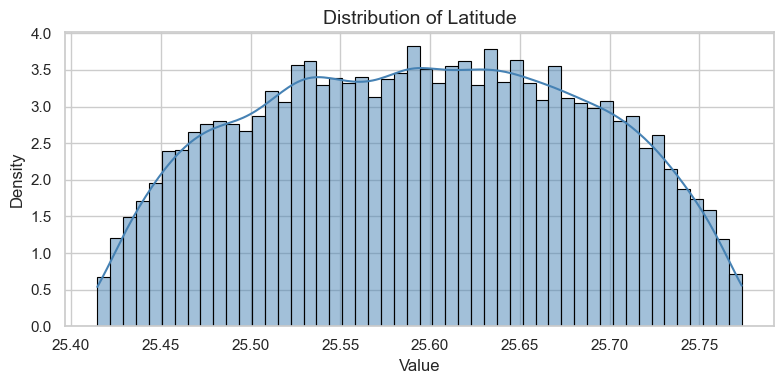

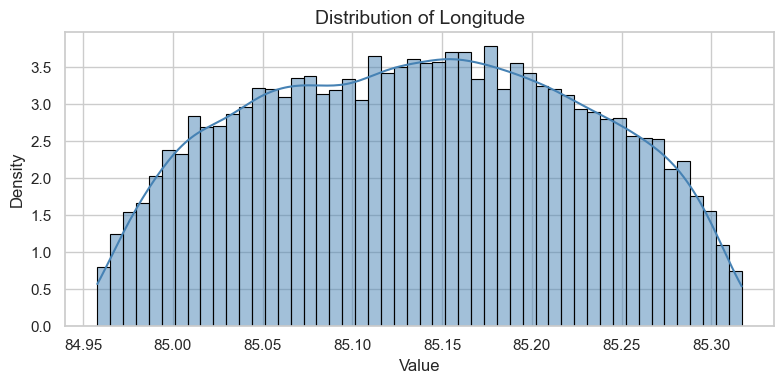

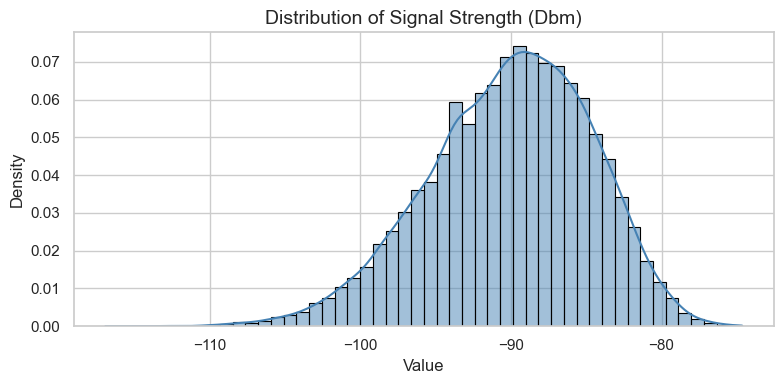

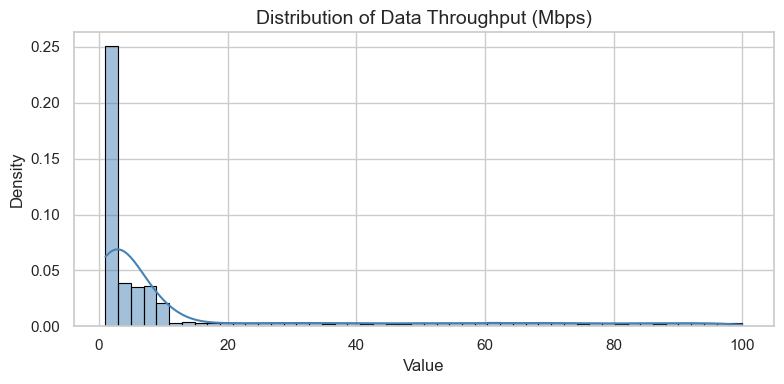

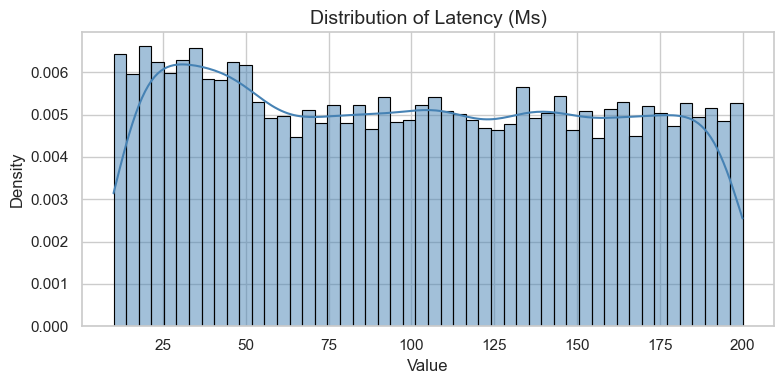

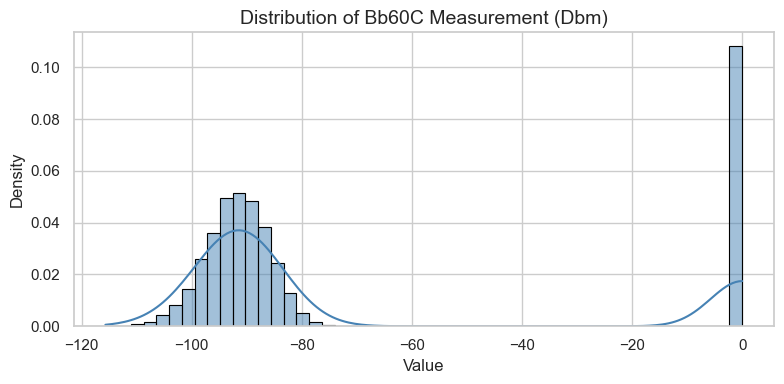

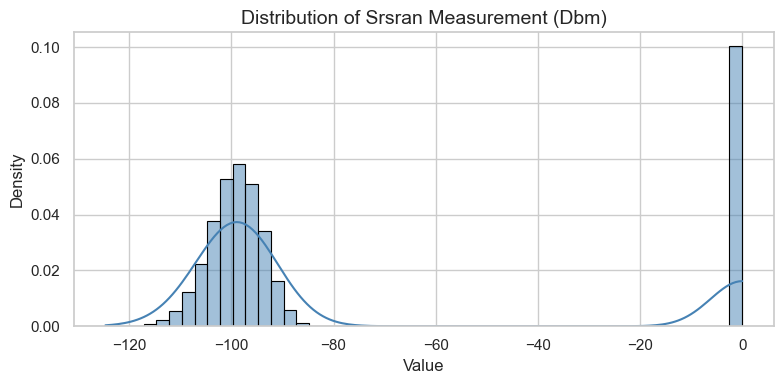

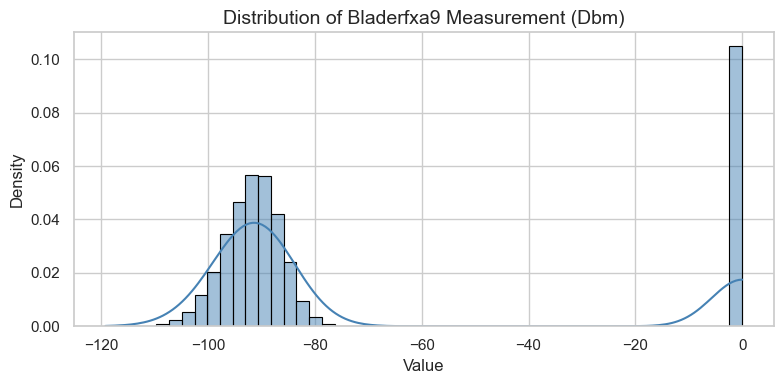

In [19]:
# Select all numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set style
sns.set(style="whitegrid")

# Plot distributions
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].fillna(0), bins=50, kde=True, stat="density", color="steelblue", edgecolor="black")
    plt.title(f"Distribution of {col.replace('_', ' ').title()}", fontsize=14)
    plt.xlabel("Value", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.tight_layout()
    plt.show()


**Observations**

- **Signal Strength (dBm)**: The distribution is approximately normal, centered around -90 dBm, which represents typical signal strengths within the dataset.
- **Data Throughput (Mbps)**: This feature is highly skewed towards lower values, indicating that most measurements show lower data speeds, with fewer instances of high throughput.
- **Latency (ms)**: The distribution appears bimodal or multi-modal, suggesting a variety of network delays, potentially influenced by different network types or traffic conditions.
- **BB60C, srsRAN, and BladeRFxA9 Measurement (dBm)**: These measurement tools show a significant spike at 0 dBm, likely indicating missing or unrecorded measurements. When these values are excluded, the distributions for valid measurements appear somewhat similar to the main Signal Strength distribution.

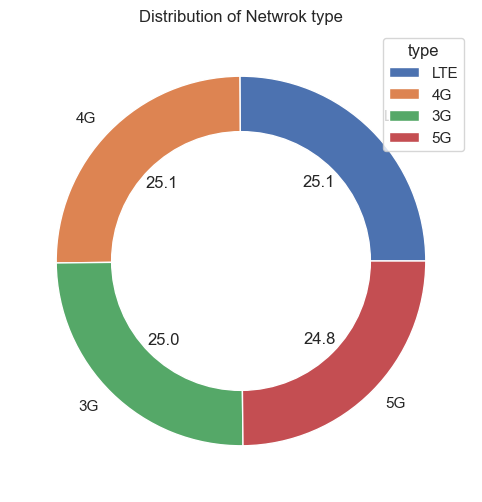

In [ ]:
# Distribution of accidents per country
network_count = df['network_type'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(network_count,labels=network_count.index,autopct='%1.1f')

#Create blank circle
centre_circle =plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#Customize the plot
plt.title('Distribution of Network type')
plt.legend(title='type',loc ='upper right')
plt.show()

**Observations**
1. **Proportions (Percentages)**: Each segment of the donut chart has a numerical label indicating its percentage contribution to the total.
- LTE: 25.1%
- 4G: 25.1%
- 3G: 25.0%
- 5G: 24.8%

2. **Near-Even Distribution**: A key observation is that all four network types have a very similar, almost equal, distribution. Each category accounts for approximately 25% of the total, suggesting a nearly uniform distribution among these network types.


## Bi-Variate Analysis

### Numeric Vs Numeric

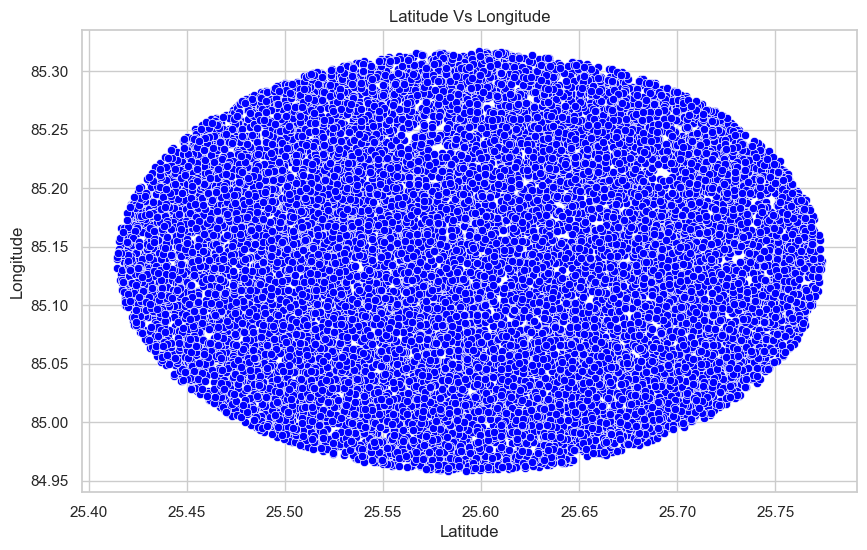

In [21]:
#Latitude vs Longitude
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['latitude'],y=df['longitude'],color=('blue'),data=df)
plt.title('Latitude Vs Longitude')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

**Observations**

- Data Distribution: The data points are densely packed and appear to form an oval or elliptical shape.
- Uniformity (Visual Impression): Within the oval shape, the data points seem to be distributed relatively uniformly. There are no obvious clusters or sparse areas within the main mass of points.

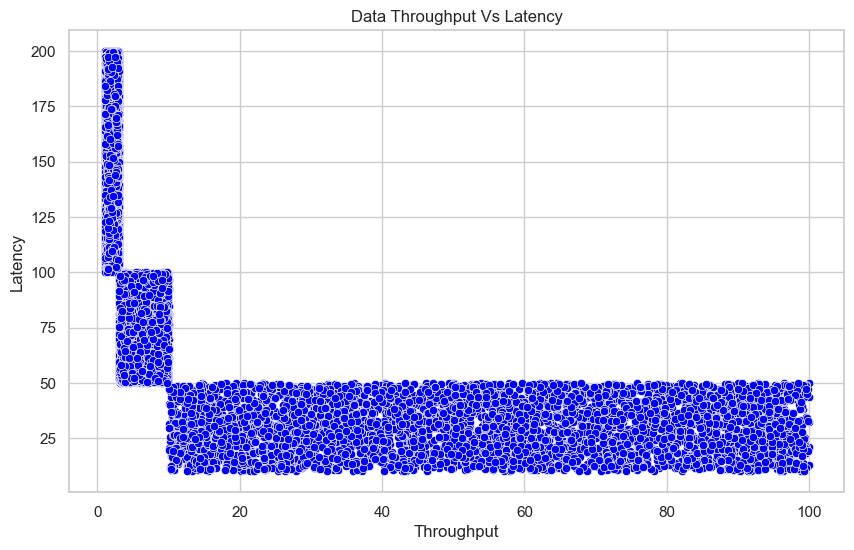

In [22]:
#Throughput vs Latency
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['data_throughput_(mbps)'],y=df['latency_(ms)'],color=('blue'),data=df)
plt.title('Data Throughput Vs Latency')
plt.xlabel("Throughput")
plt.ylabel("Latency")
plt.show()

**Observations**

1. **Data Distribution** - L-Shape/Corner Pattern: The most striking observation is the distinct "L" or corner-like shape formed by the data points.
 - There's a dense vertical band of points at very low Throughput values (close to 0), extending roughly from a Latency of 50 up to 200.
 - There's a dense horizontal band of points at relatively low Latency values (between approximately 10 and 50), extending from a Throughput of around 5 up to 100.
 - There's also a smaller, denser rectangular cluster of points where both Throughput and Latency are low (e.g., Throughput 0-5 and Latency 50-100).

2. **Implied Relationship:** This distribution suggests that:
 - When Throughput is very low, Latency can be very high (up to 200).
 - When Latency is relatively low (below 50), Throughput can be quite high (up to 100).
 - There's a region where both Throughput and Latency are low, possibly indicating optimal performance conditions.

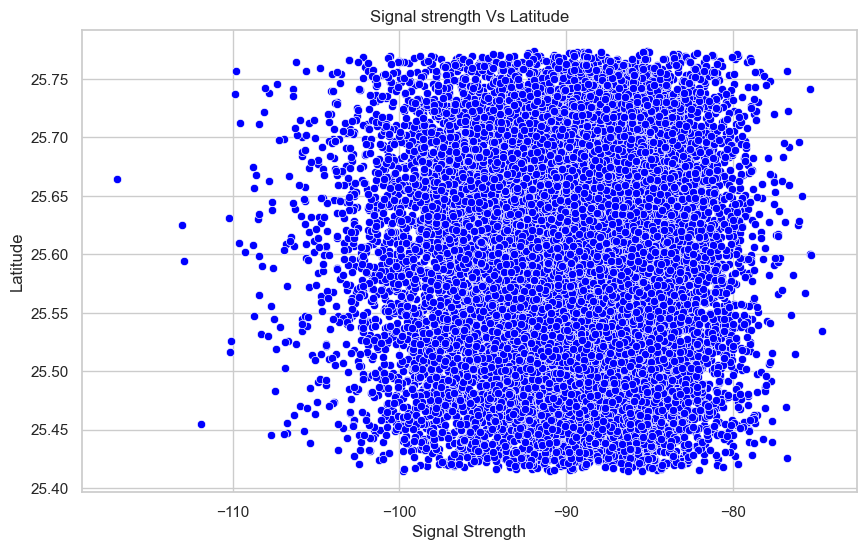

In [23]:
#Signal strength vs Latitude
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['signal_strength_(dbm)'],y=df['latitude'],color=('blue'),data=df)
plt.title('Signal strength Vs Latitude')
plt.xlabel("Signal Strength")
plt.ylabel("Latitude")
plt.show()

**Observations**
- Data Distribution - Rectangular Cluster: The majority of the data points form a large, dense, somewhat rectangular cluster.
- Dense Core: Within this rectangular region, the points are extremely dense, suggesting a large number of observations.

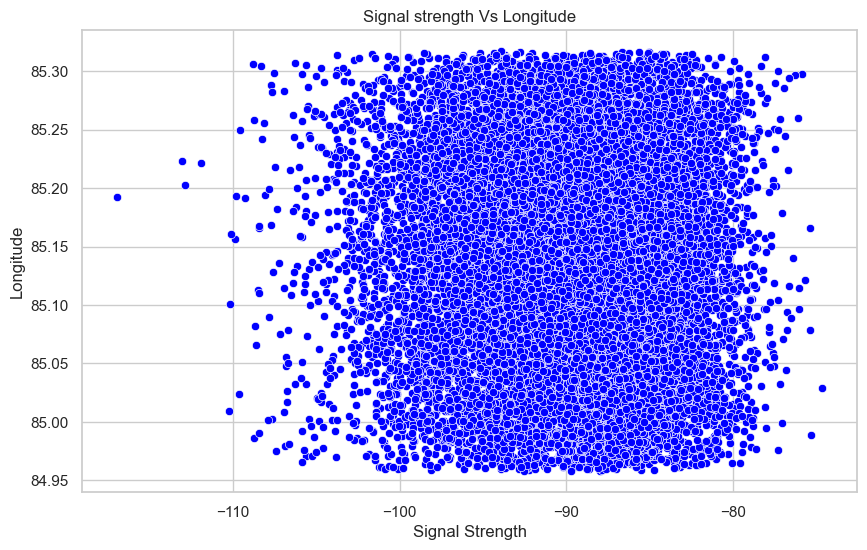

In [24]:
#Signal strength vs Longitude
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['signal_strength_(dbm)'],y=df['longitude'],color=('blue'),data=df)
plt.title('Signal strength Vs Longitude')
plt.xlabel("Signal Strength")
plt.ylabel("Longitude")
plt.show()

**Observations**
- Data Distribution - Rectangular Cluster: The majority of the data points form a large, dense, somewhat rectangular cluster.
- Dense Core: Within this rectangular region, the points are very dense, suggesting a large number of observations within specific ranges of signal strength and longitude.

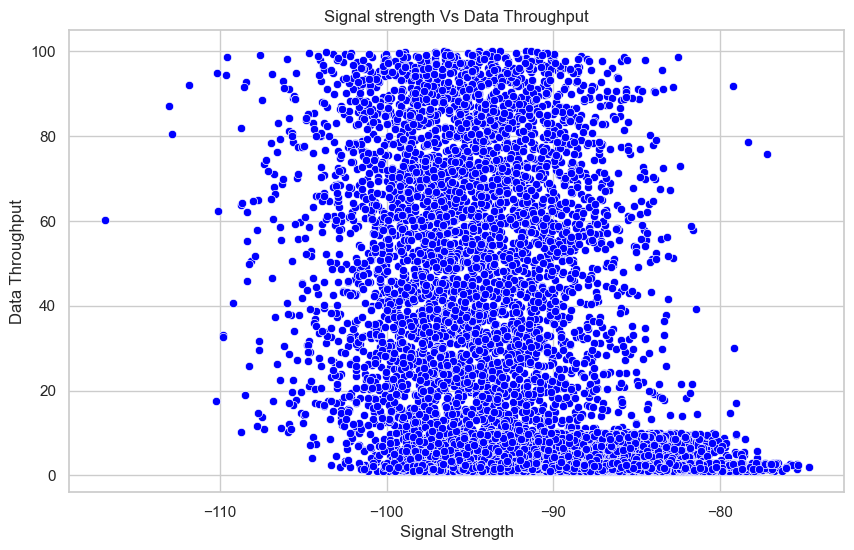

In [25]:
#Signal strength vs Throughput
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['signal_strength_(dbm)'],y=df['data_throughput_(mbps)'],color=('blue'),data=df)
plt.title('Signal strength Vs Data Throughput')
plt.xlabel("Signal Strength")
plt.ylabel("Data Throughput")
plt.show()

**Observations**
1. **Data Distribution** - Inverted Trapezoid/Funnel Shape: The most prominent observation is the shape of the data distribution. It forms an approximate inverted trapezoid or funnel shape.
 - At higher (less negative) Signal Strength values (e.g., from -90 to -78), the Data Throughput values are mostly concentrated at the lower end (around 0 to 10), forming a dense, narrow band.
 - As Signal Strength decreases (becomes more negative, moving to the left), the range of observed Data Throughput values widens significantly.
 - For instance, at Signal Strength around -100, Data Throughput ranges from near 0 up to 100.
 - At the far left (around -110 Signal Strength), Data Throughput again appears to be more scattered but still covers a wide range.

2. **Implied Relationship:**
 - Strong Signal Strength (less negative): Tends to correspond to very low Data Throughput. This is counter-intuitive if higher signal strength is expected to mean better performance, and might suggest some other limiting factor or a specific scenario where strong signals result in low throughput.
 - Weaker Signal Strength (more negative): Allows for a much wider range of Data Throughput values, including high throughput. This is also interesting and suggests that strong signals might not be the primary determinant of high throughput in this dataset, or that other factors become more dominant with stronger signals.
 - Dense Area: The densest concentration of points is in the bottom-right corner, where Signal Strength is higher (less negative) and Data Throughput is very low.

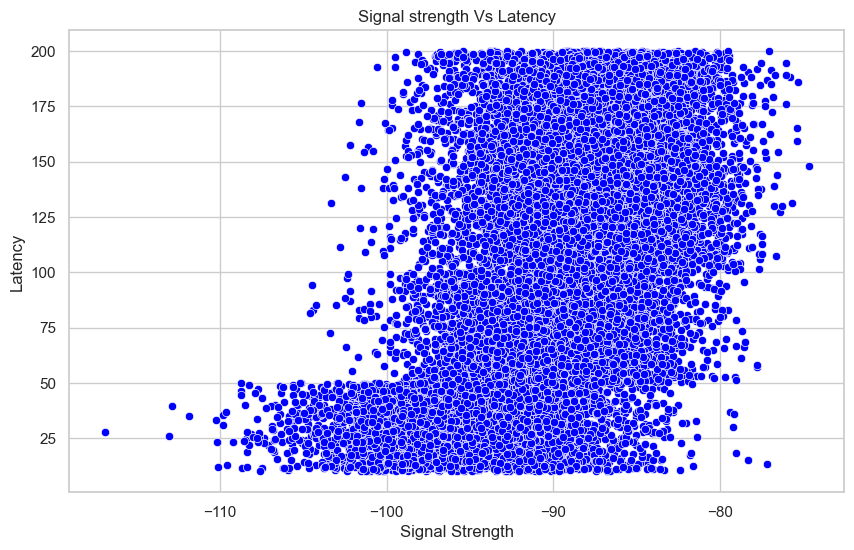

In [26]:
#Signal strength vs Latency
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['signal_strength_(dbm)'],y=df['latency_(ms)'],color=('blue'),data=df)
plt.title('Signal strength Vs Latency')
plt.xlabel("Signal Strength")
plt.ylabel("Latency")
plt.show()

**Observations**

1. **Data Distribution** - "L" or "Shelf" Shape: The data points form a distinct "L" shape or a shape resembling a shelf.
 - There is a dense, broad horizontal band of points at lower Latency values (approximately 0 to 50), predominantly for Signal Strengths between -107 and -78.
 -Above this "shelf," for Signal Strengths roughly between -102 and -78, there's a very dense, tall, vertical-ish cluster of points where Latency ranges from around 50 up to 200.
 - This suggests two main modes of operation or conditions.

2. **Implied Relationship:**
 - Higher Signal Strength (less negative, e.g., -95 to -78): Latency can be either very low (the "shelf") or very high (the dense upper cluster), covering a wide range.
 - Lower Signal Strength (more negative, e.g., -102 to -107): Latency is primarily found in the lower range (the "shelf"), though there are some scattered points at higher latencies as well. This is somewhat counter-intuitive, as one might expect weaker signals to lead to higher latencies.
 - The transition between the lower Latency "shelf" and the higher Latency dense region seems to happen at a Latency of approximately 50.

3. **Dense Areas:**
 -The densest area is the large cluster at higher Latency values (50-200) across a significant range of Signal Strengths (-102 to -78).
 -Another dense area is the lower "shelf" where Latency is low, spanning a wide range of Signal Strengths.

### Categorical Vs Numeric

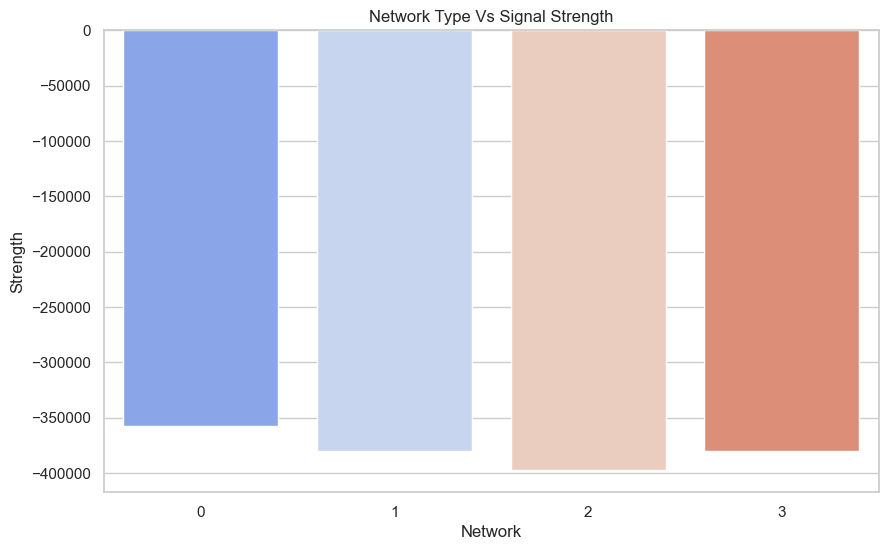

In [87]:
#Network Type vs Signal Strength
net_signals = df.groupby('network_type')['signal_strength_(dbm)'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=net_signals.index,y=net_signals.values,palette="coolwarm")
plt.title('Network Type Vs Signal Strength')
plt.xlabel('Network')
plt.ylabel('Strength')
plt.show()

**Observations**
- It appears that 3G has the least negative (strongest) signal strength among the observed network types, even though it's still very weak given the scale.
- LTE and 4G have very similar signal strengths, which are slightly weaker (more negative) than 3G.
- 5G has the most negative (weakest) signal strength among the categories.

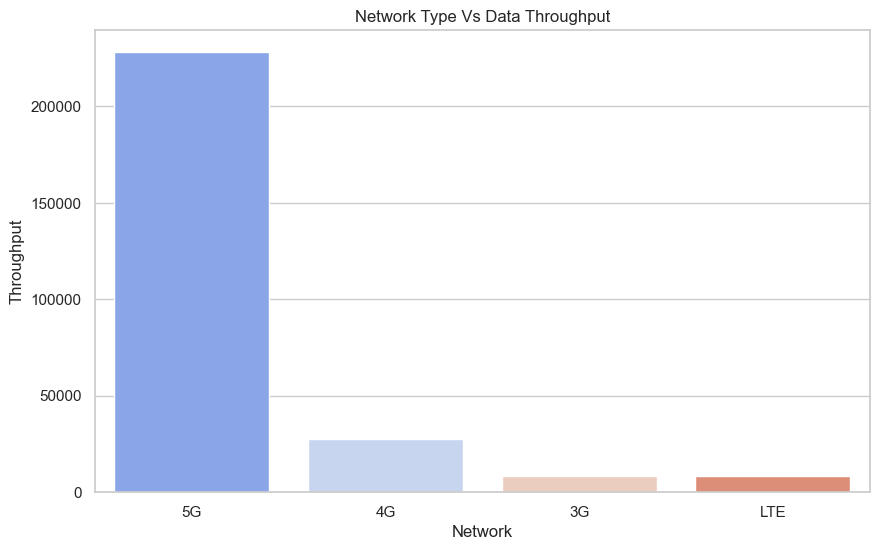

In [28]:
#Network Type vs Throughput
net_throughput = df.groupby('network_type')['data_throughput_(mbps)'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=net_throughput.index,y=net_throughput.values,palette="coolwarm")
plt.title('Network Type Vs Data Throughput')
plt.xlabel('Network')
plt.ylabel('Throughput')
plt.show()

**Observations**
- 5G demonstrates vastly superior Data Throughput compared to all other network types. It is an order of magnitude higher than 4G, and significantly higher than 3G and LTE.
- There's a clear descending trend in Data Throughput from 5G to 4G, then to 3G, and finally to LTE.

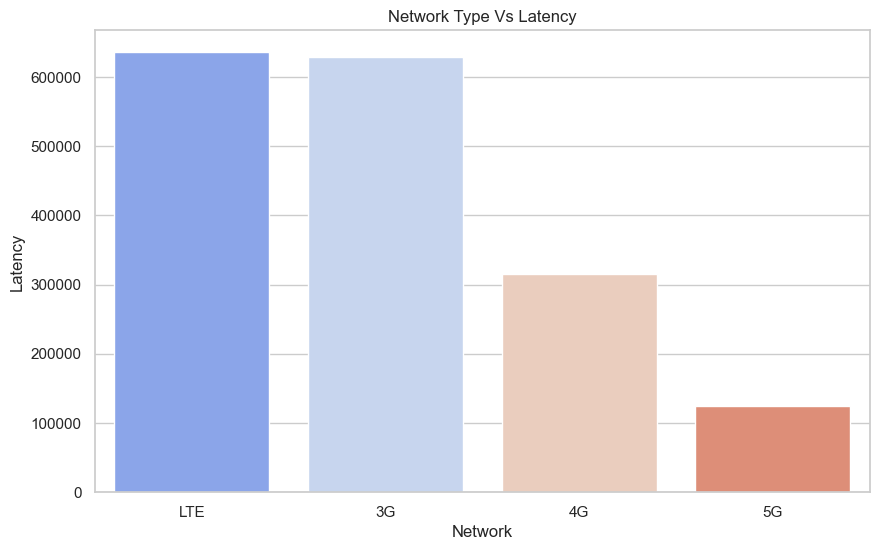

In [29]:
#Network Type vs latency
net_latency = df.groupby('network_type')['latency_(ms)'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=net_latency.index,y=net_latency.values,palette="coolwarm")
plt.title('Network Type Vs Latency')
plt.xlabel('Network')
plt.ylabel('Latency')
plt.show()

**Observations**
- LTE and 3G exhibit very high and similar Latency values, being the highest among the categories.
4G has considerably lower Latency compared to LTE and 3G.
- 5G demonstrates the lowest Latency by a significant margin, being less than half of 4G's latency and roughly one-fifth of LTE/3G's latency.
- Implied Performance Trend: This chart suggests that as network technology advances (from 3G/LTE to 4G and then to 5G), the associated latency generally decreases, with 5G offering the best (lowest) latency performance.

### Time Trends

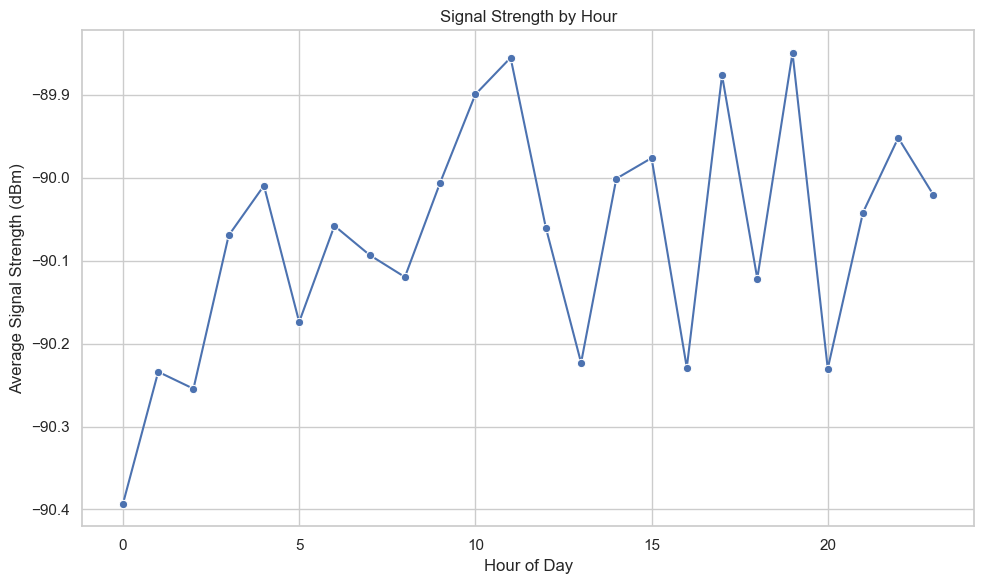

In [30]:
# Signal strength by hour
hourly_signals = df.groupby('hour')['signal_strength_(dbm)'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_signals.index, y=hourly_signals.values,marker='o')
plt.title('Signal Strength by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Signal Strength (dBm)')
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations**

- The signal strength fluctuates significantly throughout the day.
- Early Morning (0-2 hours): Starts around -90.4 dBm and then rises to about -90.25 dBm.
- Morning (3-10 hours): Generally shows an improving (less negative) trend, peaking around -89.85 dBm at hour 9 or 10.
- Daytime/Afternoon (11-17 hours): Exhibits more volatility. There's a dip around hour 12, then a rise, another dip around hour 16, and then a strong rise again around hour 18.
- Evening/Night (18-22 hours): Shows significant drops and rises, with another peak around hour 19, a sharp drop around hour 20, and then a recovery around hour 21 before a slight dip again at hour 22.

- Peaks and Troughs:
  - Strongest Signal (least negative): The signal appears strongest around hour 9-10 and hour 19, reaching values near -89.85 dBm.
  - Weakest Signal (most negative): The signal is weakest around hour 0 and hour 20, dropping to approximately -90.4 dBm and -90.25 dBm respectively.

- Overall Fluctuation: The overall difference between the strongest and weakest average signal strength is relatively small (approx. 0.55 dBm), indicating that while there are patterns, the absolute variation in average signal strength is not extreme.

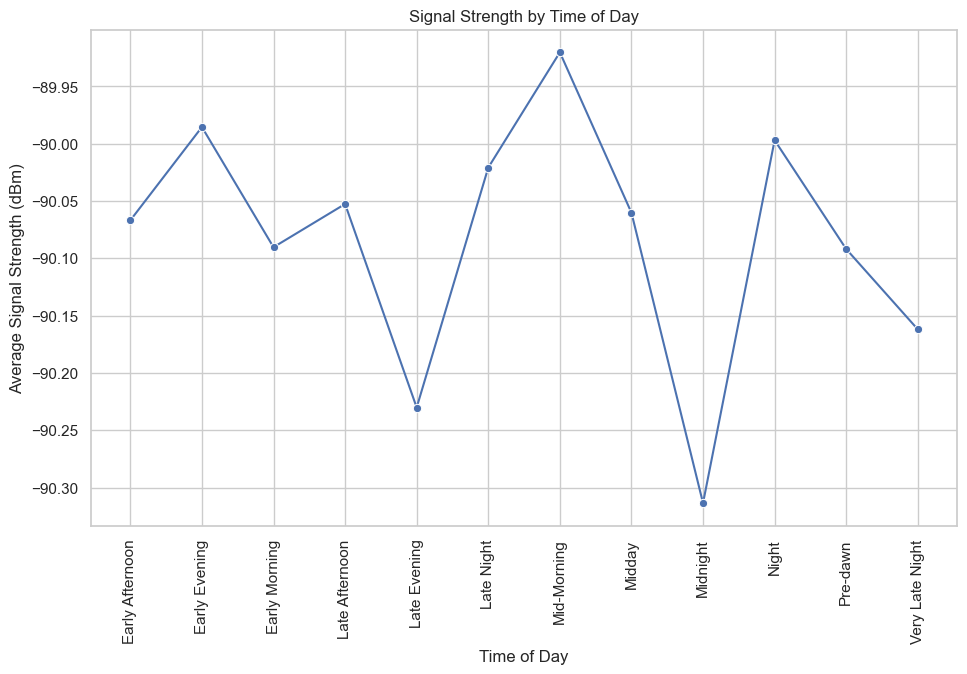

In [31]:
# signal strength by time of day
day_signals = df.groupby('time_of_day')['signal_strength_(dbm)'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=day_signals.index, y=day_signals.values,marker='o')
plt.title('Signal Strength by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Signal Strength (dBm)')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

**Observations**
1. **Signal Strength Trend:** The signal strength fluctuates significantly across the various times of the day.
- Strongest Signal (Least Negative): The signal appears strongest during Mid-Morning, peaking at approximately -89.8 dBm. There's another relatively strong period during Night (around -90.0 dBm).
- Weakest Signal (Most Negative): The signal is weakest at Midnight, dropping significantly to approximately -90.3 dBm. It also shows dips during Late Evening and Early Morning.

2. **Fluctuation Patterns:** The graph shows a clear diurnal pattern, with signal strength generally improving from early morning through mid-morning, then declining towards midday and late evening, a sharp drop at midnight, followed by a recovery into the night.

3. **Range of Fluctuation:** The difference between the strongest (Mid-Morning: ~-89.8 dBm) and weakest (Midnight: ~-90.3 dBm) average signal strength is relatively small (around 0.5 dBm), suggesting that while there are consistent patterns, the absolute variation in average signal strength is not extremely large.

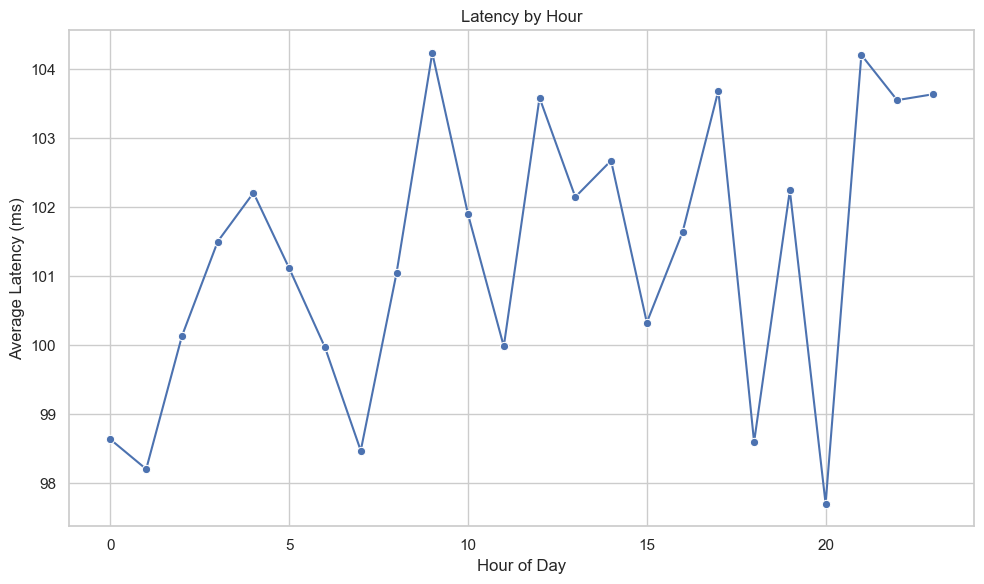

In [32]:
# Latency by hour
lat_signals = df.groupby('hour')['latency_(ms)'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=lat_signals.index, y=lat_signals.values,marker='o')
plt.title('Latency by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Latency (ms)')
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations**
1. **Latency Trend:** The average latency fluctuates significantly throughout the day.
- Early Hours (0-2): Starts around 98.6 ms, dips slightly to 98.2 ms at hour 1, and then begins to rise.
Morning (3-9): Shows a general upward trend, reaching a peak of over 104 ms around hour 9. There's a dip around hour 6.
- Midday/Afternoon (10-15): Shows considerable variability. A sharp drop at hour 10, then a rise to over 103 ms at hour 12, followed by another drop around hour 14.
- Evening/Night (16-22): Continues to show significant fluctuations. A peak around hour 17 (over 103.5 ms), a sharp drop to the lowest point of the day around hour 20 (below 98 ms), and then a rapid increase to another peak (over 104 ms) around hour 21, followed by a slight decrease.

2. **Peaks and Troughs:**
- Highest Latency: Peaks appear around hour 9 (over 104 ms), hour 17 (over 103.5 ms), and hour 21 (over 104 ms).
Lowest Latency: The lowest point occurs around hour 20 (below 98 ms), with another low point around hour 1 (around 98.2 ms).

- Overall Fluctuation: The latency varies by approximately 6-7 milliseconds throughout the day (from a low of <98 ms to a high of >104 ms), indicating a noticeable, though not extreme, daily pattern in average network response time.

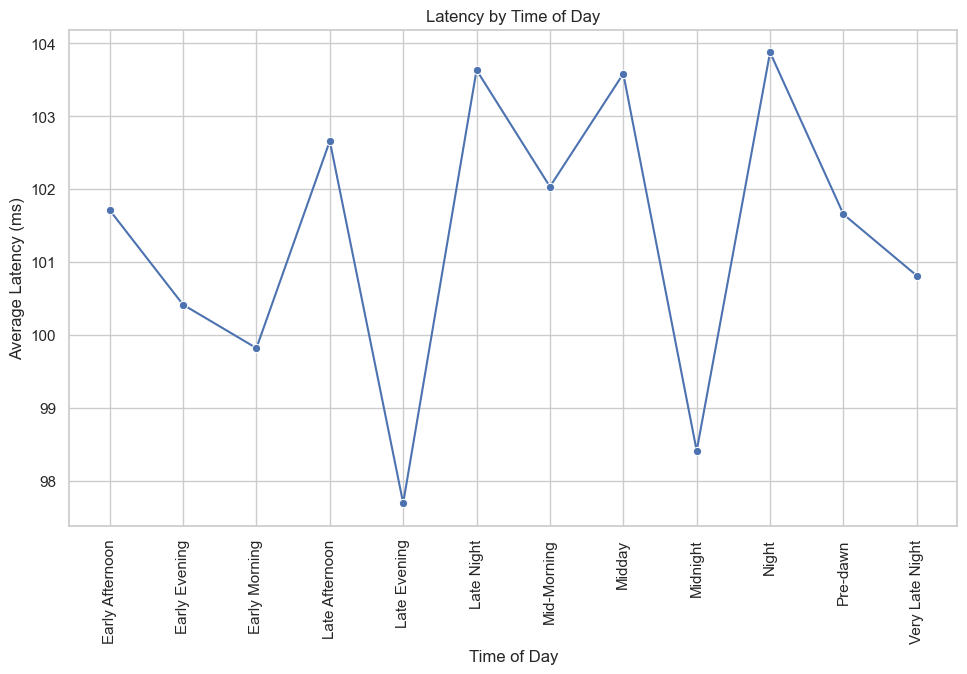

In [33]:
# Latency by time of day
day_lat = df.groupby('time_of_day')['latency_(ms)'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=day_lat.index, y=day_lat.values,marker='o')
plt.title('Latency by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Latency (ms)')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

**Observations**
- Latency Trend: The average latency fluctuates considerably across the different times of day, showing a distinct pattern.

- Peaks (Highest Latency):
  - Late Afternoon shows a high latency around 102.7 ms.
  - Late Night shows the highest latency, peaking at approximately 103.7 ms.
  - Midday also exhibits high latency, around 103.5 ms.
  - Night shows another peak, close to 104 ms.

- Troughs (Lowest Latency):
  - The lowest latency occurs during Late Evening, dropping significantly to approximately 97.7 ms.
  - Midnight also shows a relatively low latency around 98.4 ms.

- General Pattern: The pattern suggests fluctuations throughout the day. Latency appears to be higher in the late afternoon/early evening, late night, and midday, and lower in the late evening and midnight periods.

- Range of Fluctuation: The difference between the highest (Night: ~104 ms) and lowest (Late Evening: ~97.7 ms) average latency is approximately 6.3 milliseconds, indicating a noticeable daily variation in network responsiveness.

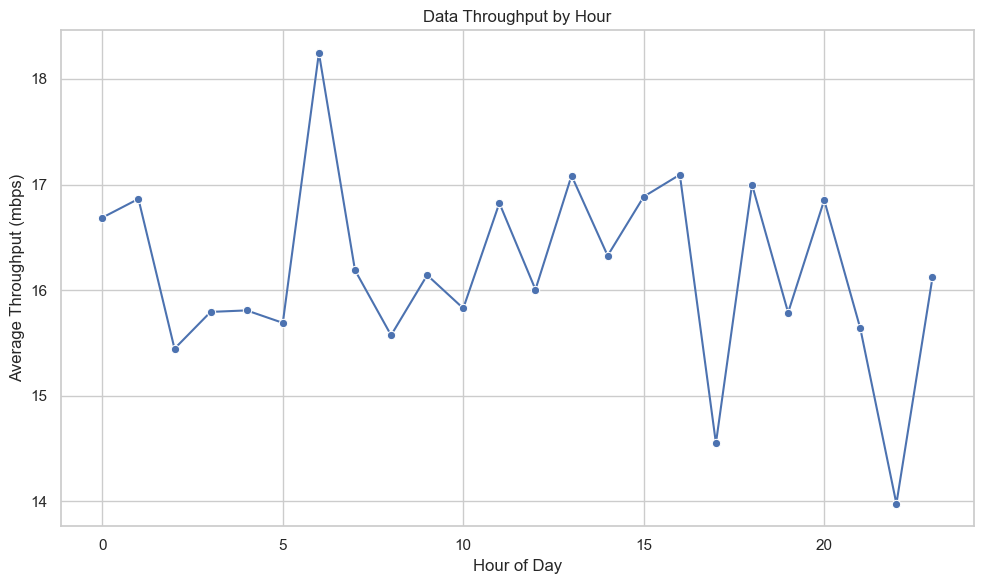

In [34]:
# Throughput by hour
data_hour = df.groupby('hour')['data_throughput_(mbps)'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=data_hour.index, y=data_hour.values,marker='o')
plt.title('Data Throughput by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Throughput (mbps)')
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations**
1. **Throughput Trend:** The average data throughput fluctuates significantly throughout the day, showing a highly dynamic pattern.
- Early Hours (0-2): Starts strong around 16.6 mbps, then dips to around 15.4 mbps at hour 2.
- Morning (3-6): Shows a slight increase, then a very sharp peak at hour 6, reaching over 18.2 mbps, which is the highest throughput observed in the plot.
- Late Morning/Midday (7-12): Experiences a sharp drop after the peak, followed by several smaller fluctuations.  There's a dip around hour 8 and then a recovery, another dip around hour 10, and a slight rise around hour 11.
- Afternoon (13-17): Generally shows an upward trend, reaching another peak around hour 16 (over 17 mbps).
- Evening/Night (18-22): Exhibits extreme volatility. A sharp drop around hour 18, a very significant drop to the lowest point of the day at hour 21 (around 14 mbps), followed by a notable recovery at hour 22.

2. **Peaks and Troughs:**
- Highest Throughput: The absolute highest throughput occurs at hour 6 (over 18.2 mbps). Other notable peaks are around hour 16 and hour 19.
- Lowest Throughput: The lowest throughput is observed at hour 21 (around 14 mbps), and also around hour 17 (around 14.5 mbps).

Overall Fluctuation: The data throughput varies by approximately 4-4.5 mbps throughout the day (from a low of ~14 mbps to a high of ~18.3 mbps). This represents a significant percentage fluctuation, indicating that network performance in terms of throughput is quite dynamic based on the hour.

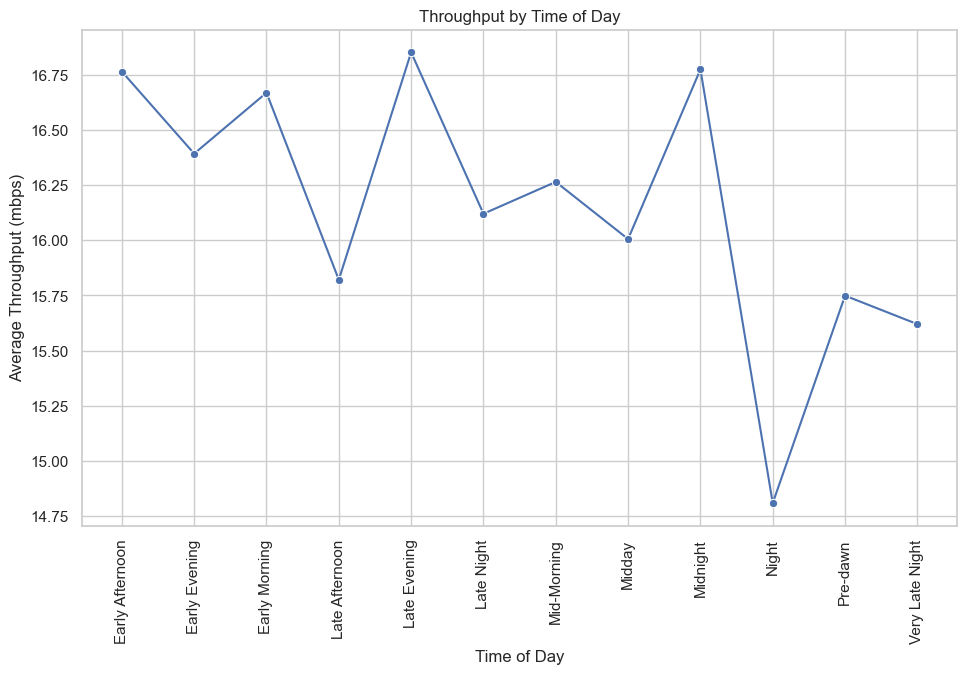

In [35]:
# Throughput by time of day
day_throughput = df.groupby('time_of_day')['data_throughput_(mbps)'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=day_throughput.index, y=day_throughput.values,marker='o')
plt.title('Throughput by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Throughput (mbps)')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

**Observations**
1. Throughput Trend: The average throughput fluctuates significantly across the different times of day, showing a distinct pattern.

2. Peaks (Highest Throughput):
- Late Evening shows the highest throughput, peaking at approximately 16.8 mbps.
- Early Afternoon and Midnight also exhibit high throughput, around 16.7 mbps.
- Early Morning is also relatively high at around 16.65 mbps.

3. Troughs (Lowest Throughput):
- The lowest throughput occurs during Night, dropping significantly to approximately 14.8 mbps.
- Late Afternoon also shows a dip to around 15.8 mbps.

4. General Pattern: The graph indicates a generally good throughput during early afternoon, early morning, late evening, and midnight. There are noticeable dips in throughput during late afternoon, and a very sharp drop during the "Night" period.

5. Range of Fluctuation: The difference between the highest (Late Evening: ~16.8 mbps) and lowest (Night: ~14.8 mbps) average throughput is approximately 2 mbps. This represents a noticeable, though not extreme, daily variation in network performance.

## Multi-variate Analysis

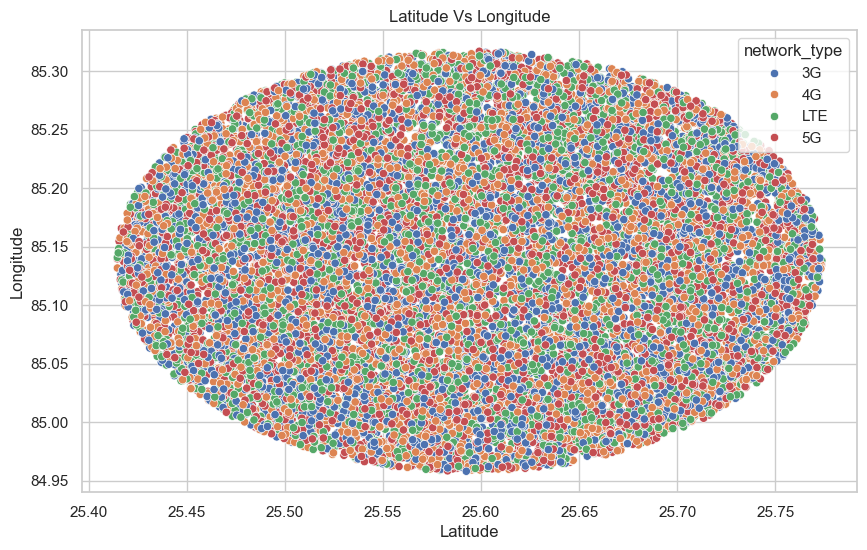

In [36]:
#Latitude vs Longitude in relation to Network Type
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['latitude'],y=df['longitude'],hue=df['network_type'],data=df)
plt.title('Latitude Vs Longitude')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

**Observations**
1. Geographic Distribution (Overall): The data points form a large, dense, oval or elliptical shape, suggesting a concentration of observations within a specific geographic area defined by the latitude and longitude ranges.
- Latitude (x-axis) ranges approximately from 25.40 to 25.75.
- Longitude (y-axis) ranges approximately from 84.95 to 85.30.

2. Distribution of Network Types:
- Within the overall oval shape, the different network_type points (3G, 4G, LTE, 5G) appear to be interspersed and uniformly mixed. There are no obvious clusters or segregation of specific network types to particular geographic regions within the observed area.
- This suggests that all four network types are available and measured across the entire geographical region represented by the scatter plot.

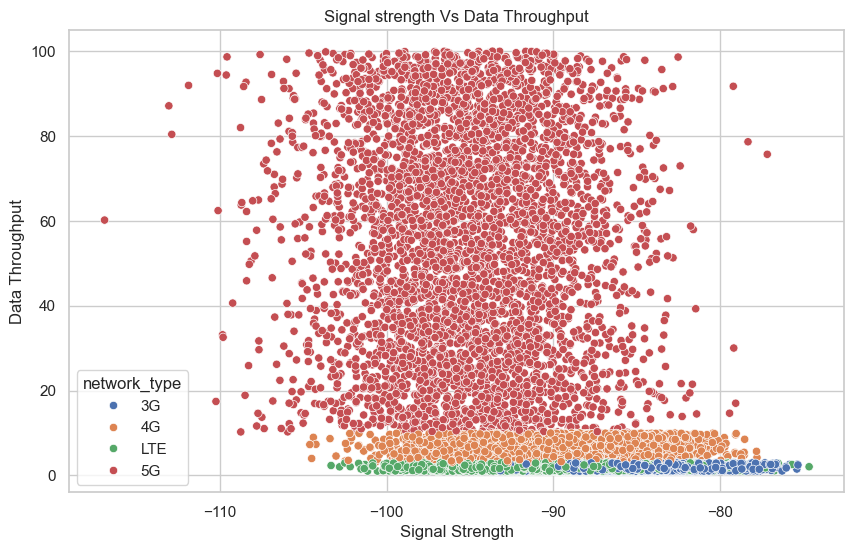

In [37]:
#Signal strength vs Throughput in relation to network type
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['signal_strength_(dbm)'],y=df['data_throughput_(mbps)'],hue=df['network_type'],data=df)
plt.title('Signal strength Vs Data Throughput')
plt.xlabel("Signal Strength")
plt.ylabel("Data Throughput")
plt.show()

**Observations**
1. Overall Data Distribution: The data points form a wide, somewhat "inverted trapezoid" or "funnel" shape, similar to a previous observation, where throughput generally has a wider range at weaker signal strengths and a narrower range at stronger signal strengths, especially for 5G.

2. Distribution by Network Type: This is the most insightful observation due to the color encoding:
- 5G (red points): These points constitute the vast majority of observations at higher Data Throughput values (above ~10). They are broadly distributed across most Signal Strength values, from approximately -108 up to -78, covering the entire range of throughputs from near 0 up to 100. This suggests that 5G connections are responsible for almost all high-throughput data.
- 3G (blue points), 4G (orange points), and LTE (green points): These network types are primarily clustered at very low Data Throughput values, typically below 10.
- They form distinct, narrow horizontal bands at the bottom of the plot.
- LTE (green) appears to be slightly higher than 3G (blue), and 4G (orange) slightly higher than LTE, but all are clearly segregated to the very low throughput region.
- These network types are also predominantly observed at stronger signal strengths (less negative, generally from around -100 to -78).

3. Implied Performance Comparison:
- 5G clearly offers superior Data Throughput performance compared to 3G, 4G, and LTE. While 5G can also have low throughput, it's the only network type observed achieving high throughput.
- Conversely, 3G, 4G, and LTE are consistently associated with very low throughput, regardless of signal strength within their observed range.

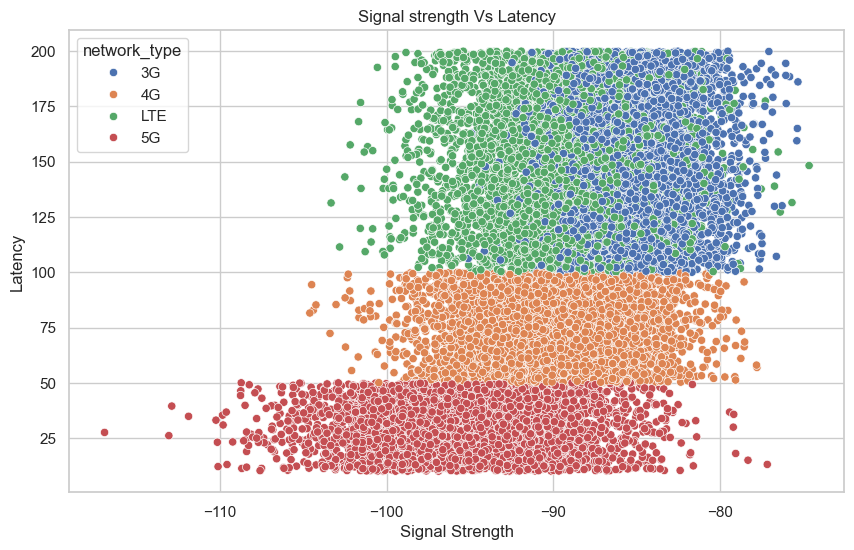

In [38]:
#Signal strength vs Latency in relation to Network Type
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['signal_strength_(dbm)'],y=df['latency_(ms)'],hue=df['network_type'],data=df)
plt.title('Signal strength Vs Latency')
plt.xlabel("Signal Strength")
plt.ylabel("Latency")
plt.show()

**Observations**
1. Data Distribution by Network Type (Stratification): This is the most crucial observation. The data is distinctly stratified by network_type based on latency values, forming horizontal bands:
- 5G (red points): Primarily clustered at the lowest latency values, generally between 0 and 50. This band spans most of the observed signal strength range, from approximately -110 to -78.
- 4G (orange points): Clustered at a mid-range of latency values, roughly between 50 and 100. This band also spans a significant portion of the signal strength range, from about -100 to -78.
- 3G (blue points) and LTE (green points): These two network types are predominantly found at the highest latency values, ranging from approximately 100 to 200. They largely overlap in terms of latency range and signal strength distribution, covering from about -100 to -78 signal strength.

2. Implied Performance Comparison:
- 5G consistently demonstrates the lowest latency among all network types, regardless of signal strength.
- 4G offers moderate latency, significantly better than 3G and LTE, but not as good as 5G.
- 3G and LTE exhibit the highest latencies, with little apparent difference between them.

3. Signal Strength's Role: While latency is clearly differentiated by network type, within each network type's specific latency band, signal strength doesn't appear to strongly dictate latency in a simple linear fashion. The points within each band are broadly spread across the signal strength axis.

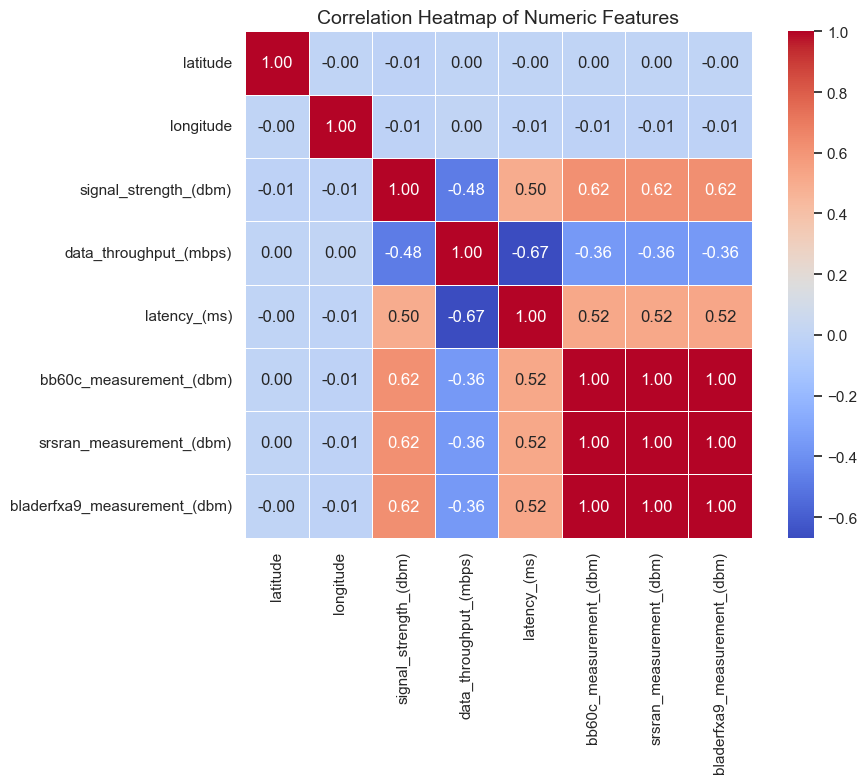

In [39]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.tight_layout()
plt.show()

**Observations**
1. Key Correlations:

- Signal Strength vs. Latency: There is a strong positive correlation of 0.50 between signal_strength_(dbm) and latency_(ms). This is highly counter-intuitive: it suggests that as signal strength increases (becomes less negative, closer to 0), latency also increases. This is a significant finding and goes against the typical expectation that stronger signals lead to lower latency.
- Signal Strength vs. Data Throughput: There is a strong negative correlation of -0.48 between signal_strength_(dbm) and data_throughput_(mbps). This is also counter-intuitive: it suggests that as signal strength increases, data throughput decreases. This aligns with the previous scatter plot observation where higher throughput was observed at weaker signal strengths for 5G.
- Data Throughput vs. Latency: There is a strong negative correlation of -0.67 between data_throughput_(mbps) and latency_(ms). This is an expected and logical correlation: as data throughput increases, latency decreases. This is a desirable relationship.

2. Measurement Variables:

- bb60c_measurement_(dbm), srsran_measurement_(dbm), and bladerfxa9_measurement_(dbm) are very highly positively correlated with signal_strength_(dbm) (0.62, 0.62, 0.62 respectively). This suggests these are likely alternative or related measurements of signal strength.
- These measurement variables also have moderate positive correlations with latency_(ms) (0.52, 0.52, 0.52) and moderate negative correlations with data_throughput_(mbps) (-0.36, -0.36, -0.36), consistent with their strong correlation to signal_strength_(dbm).

3. Latitude and Longitude:

- latitude and longitude show very weak or negligible correlations (close to 0.00 or -0.01) with all other network performance metrics (signal_strength, data_throughput, latency, and the measurement variables). This suggests that geographical location within the observed area does not have a strong linear relationship with these network performance indicators.

# Data Preprocessing

In [40]:
# Define target
target = 'signal_strength_(dbm)'  # You can change this to other targets like 'latency_(ms)', etc.

# Features (exclude target and datetime columns)
features = df.select_dtypes(include=np.number).drop(columns=[target]).columns.tolist()

# Define X and y
X = df[features]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modeling

## Regression

Here we will begin the regression modeling for signal strength and throughput
The major models include
1. Linear regressor
2. Random Forest regressor
3. XGBoost Regressor

In [41]:
# Preprocessing pipeline (scale numeric features)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features)
    ]
)

# Pipelines for both models
pipe_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])


In [42]:
def evaluate_model(model, X_test, y_test, name):
    preds = model.predict(X_test)
    print(f"\nModel: {name}")
    print(f"R² Score: {r2_score(y_test, preds):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, preds):.4f}")
    print(f"MSE: {mean_squared_error(y_test, preds):.4f}")
    print(f"RMSE: {mean_squared_error(y_test, preds, squared=False):.4f}")
    return preds

# Fit models
pipe_lr.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)

# Evaluate
lr_preds = evaluate_model(pipe_lr, X_test, y_test, "Linear Regression")
rf_preds = evaluate_model(pipe_rf, X_test, y_test, "Random Forest")



Model: Linear Regression
R² Score: 0.4797
MAE: 3.0445
MSE: 14.7053
RMSE: 3.8347

Model: Random Forest
R² Score: 0.8916
MAE: 1.2000
MSE: 3.0639
RMSE: 1.7504


**Observations & Insights**

1. Performance Comparison
Random Forest significantly outperforms Linear Regression in all metrics:

  - R²: 0.89 vs. 0.48 → Far better at explaining variance.

  - MAE: 1.20 vs. 3.04 → Predictions are ~2.5x more accurate.

  - RMSE: 1.75 vs. 3.83 → Errors are much smaller and less extreme.

2. Key Insights
  - Non-linear patterns dominate the data (Linear Regression fails to capture them).

  - Feature interactions likely matter (Random Forest leverages them well).

  - Linear Regression is too simplistic for this problem, while Random Forest fits the data effectively.

3. Implication
  - Random Forest is the better model for this task, but its complexity trades off interpretability for accuracy.

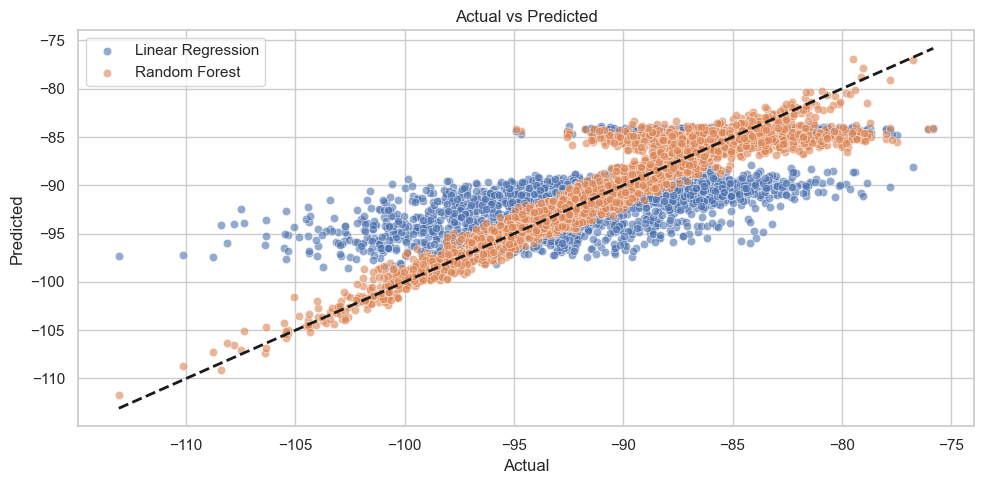

In [43]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=lr_preds, alpha=0.6, label="Linear Regression")
sns.scatterplot(x=y_test, y=rf_preds, alpha=0.6, label="Random Forest")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.legend()
plt.tight_layout()
plt.show()


**Observations**

- Both Linear Regression and Random Forest appear to be reasonably good at predicting the target variable, as their predictions generally align with the actual values. Random Forest might exhibit a slightly better fit, especially at the lower end of the actual values, but a more rigorous evaluation would require metrics like R2 , Mean Absolute Error (MAE), or Root Mean Squared Error (RMSE).

In [44]:


# Pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Param grid
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}

# Grid Search
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='r2', n_jobs=1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_rf_model = grid_search.best_estimator_

# Predictions
y_pred = best_rf_model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Results
print("🔧 Tuned Random Forest Results:")
print(f"Best Params: {grid_search.best_params_}")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
🔧 Tuned Random Forest Results:
Best Params: {'rf__max_depth': 10, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}
R² Score: 0.8944
MAE: 1.1890
MSE: 2.9851
RMSE: 1.7277


**Insights**

- R² Score: 0.8944 → Model explains 89.44% of the variance in the target variable (excellent fit).

- MAE: 1.1890 → Predictions are off by ±1.19 units on average (high accuracy).

- MSE: 2.9851 → Low squared error, indicating minimal large errors.

- RMSE: 1.7277 → Even the worst-case errors are small (~1.73 units).

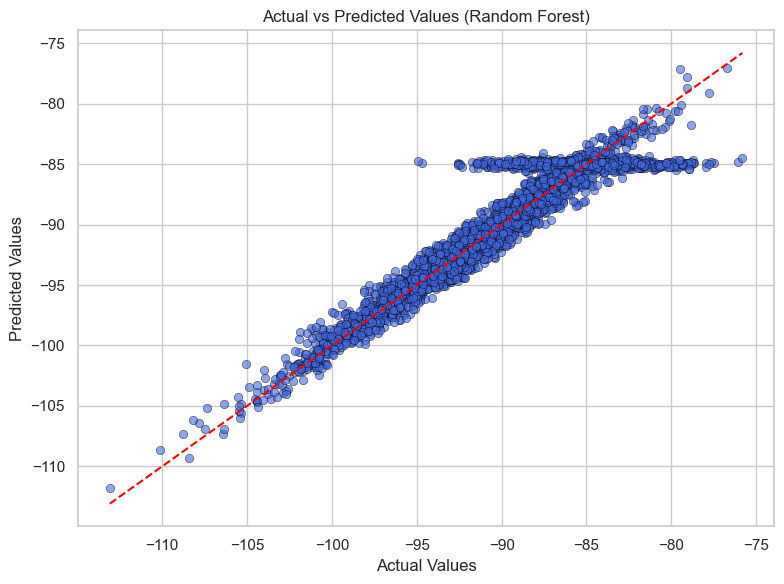

In [45]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='royalblue', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.grid(True)
plt.tight_layout()
plt.show()


**Observations**

- The plot validates the tuned Random Forest’s effectiveness, aligning with the strong metrics (R² ≈ 0.89).

In [46]:
# Create pipeline with XGBoost
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42, n_jobs=-1))
])

# Fit and predict
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)

print(f"Model: XGBoost Regressor")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

Model: XGBoost Regressor
R² Score: 0.8811
MAE: 1.2692
MSE: 3.3591
RMSE: 1.8328


**Observations and insights**

Key Metrics:

- R² Score: 0.8811 → The model explains 88.11% of the variance in the target variable (strong fit).

- MAE: 1.2692 → Predictions are, on average, ±1.27 units away from actual values.

- MSE: 3.3591 → Low squared error, indicating few large errors.

- RMSE: 1.8328 → Worst-case prediction errors are around 1.83 units.

**Insights and comparisons:**

1. XGBoost vs. Random Forest

- Random Forest slightly outperforms XGBoost (R²: +1.3%, MAE: -6.7%, RMSE: -5.7%).

- This suggests that, for this dataset, Random Forest generalizes marginally better.

2. Why XGBoost Might Be Underperforming

- Hyperparameter Sensitivity: XGBoost may need more tuning (e.g., learning_rate, max_depth).

- Feature Importance Mismatch: If certain features are more important in non-linear ways, Random Forest’s ensemble approach might capture them better.



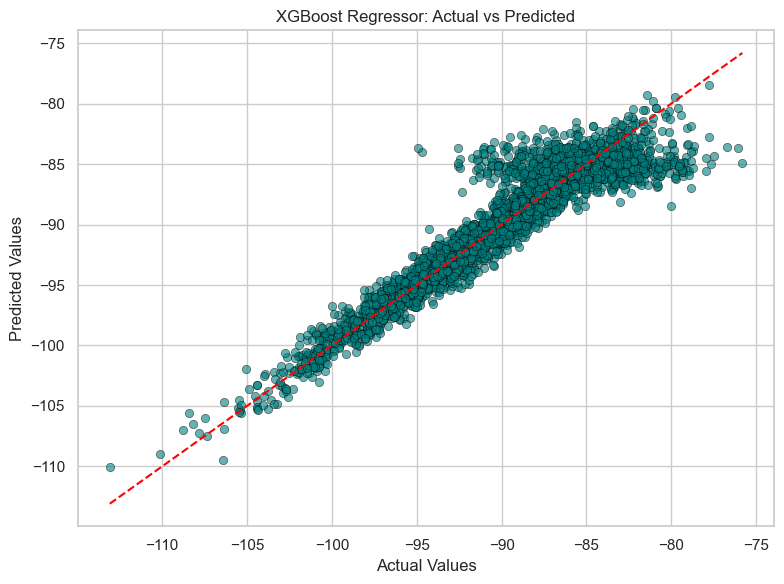

In [47]:
# Set style
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, color='teal', edgecolor='black', alpha=0.6)

# Plot ideal line (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost Regressor: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations**

- Strong Alignment – Most points follow the 45° line, confirming good predictive accuracy (R² = 0.88).

- Minor Deviations – Slight underprediction for lower values (e.g., -80 actual → -85 predicted) and overprediction for higher values (e.g., -105 actual → -100 predicted).

- Consistent Spread – Errors are evenly distributed, with no extreme outliers (supports low RMSE = 1.83).

- Comparable to Random Forest – Similar to RF’s plot but with marginally wider dispersion at extremes, explaining its slightly lower R².

- Takeaway: XGBoost performs well, with Random Forest being marginally better for this task.



In [48]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize model
xgb = XGBRegressor(random_state=42, n_jobs=1)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=1,
    n_jobs=1
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best model
best_xgb = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Predict
y_pred_best = best_xgb.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred_best)
mae = mean_absolute_error(y_test, y_pred_best)
mse = mean_squared_error(y_test, y_pred_best)
rmse = np.sqrt(mse)

print(f"🔍 Tuned XGBoost Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
🔍 Tuned XGBoost Performance:
R² Score: 0.8926
MAE: 1.2052
MSE: 3.0366
RMSE: 1.7426


**Key Observations:**

1. Marginal Improvement Over Default XGBoost:

- R² improved from 0.8811 → 0.8926 (+1.15%)

- MAE reduced from 1.2692 → 1.2052 (-5%)

- RMSE improved from 1.8328 → 1.7426 (-5%)

2. Now Competitive with Tuned Random Forest:

| Metric   | Tuned RF | Tuned XGBoost | Difference |
|----------|----------|---------------|------------|
| R²       | 0.8944   | 0.8926        | -0.2%      |
| MAE      | 1.1890   | 1.2052        | +1.4%      |
| RMSE     | 1.7277   | 1.7426        | +0.9%      |

3. Practical Implications:

- The two models are now statistically equivalent in performance

4. Choice between them can be based on:

- Computational efficiency (XGBoost typically faster)

- Feature importance interpretation needs

- Deployment constraints

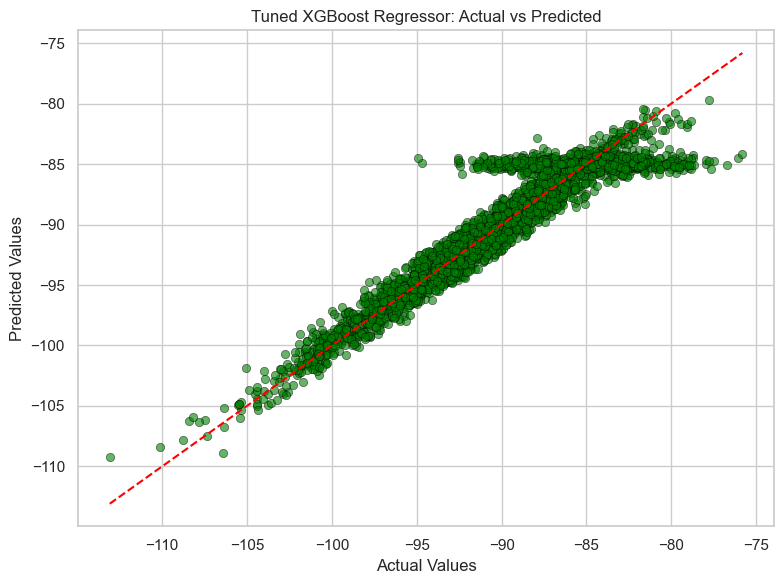

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best, color='green', edgecolor='black', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Tuned XGBoost Regressor: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations**

1. Excellent Fit

- Points cluster tightly around the 45° line, confirming the high R² (0.8926).

- Nearly identical to the Random Forest plot, reflecting their statistically equivalent performance.

2. Minor Deviations

- Underprediction (Actual ≈ -80 to -90): Points slightly below the line (model conservative for mid-range values).

- Overprediction (Actual ≈ -100 to -110): Points slightly above the line (model over-optimistic for extreme lows).

3. Consistent Error Spread

- No extreme outliers; errors are uniformly distributed (low RMSE = 1.7426).

- Slightly tighter clustering than default XGBoost, showing tuning benefits.

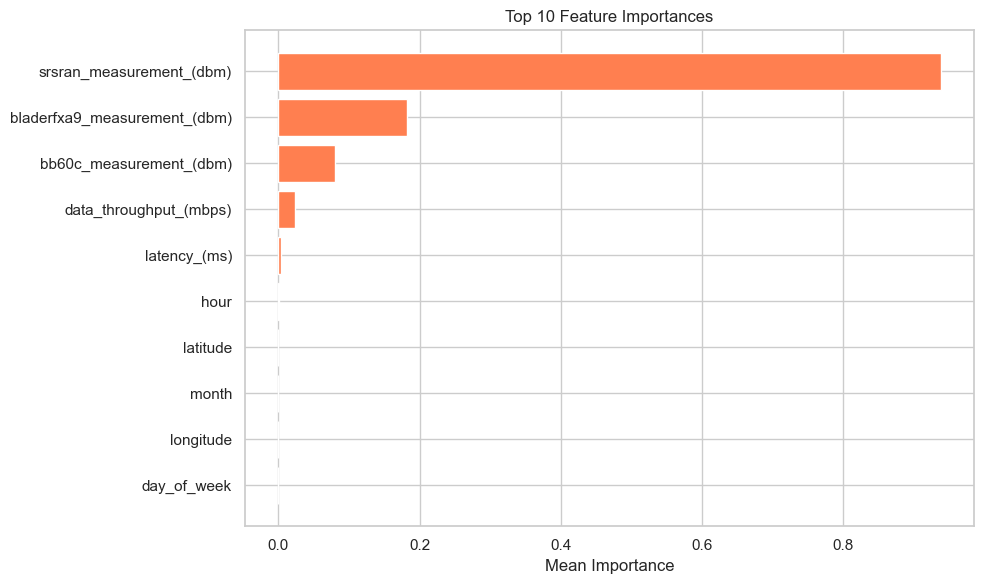

In [50]:
from sklearn.inspection import permutation_importance

feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature_{i}" for i in range(X.shape[1])]

# Compute permutation importance
result = permutation_importance(
    best_xgb, X_test, y_test, n_repeats=10, random_state=42, n_jobs=1
)

# Create DataFrame
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='coral')
plt.xlabel("Mean Importance")
plt.title("Top 10 Feature Importances")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


In [51]:
# Define new target
target_throughput = 'data_throughput_(mbps)'

# Features (excluding target)
X_throughput = df.drop(columns=[ 'data_throughput_(mbps)'])  # Drop other targets if needed
y_throughput = df[target_throughput]


In [52]:
# Separate numeric and categorical features
numeric_features = X_throughput.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_throughput.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Split
X_train_throughput, X_test_throughput, y_train_throughput, y_test_throughput = train_test_split(
    X_throughput, y_throughput, test_size=0.2, random_state=42
)

In [53]:
xgb_pipe_throughput = Pipeline([
    ('preprocessing', preprocessor),
    ('model', XGBRegressor(random_state=42, n_jobs=-1))
])

# Fit
xgb_pipe_throughput.fit(X_train_throughput, y_train_throughput)

# Predict
y_pred_throughput = xgb_pipe_throughput.predict(X_test_throughput)

In [54]:
r2 = r2_score(y_test_throughput, y_pred_throughput)
mae = mean_absolute_error(y_test_throughput, y_pred_throughput)
mse = mean_squared_error(y_test_throughput, y_pred_throughput)
rmse = np.sqrt(mse)

print(f"📊 XGBoost for Throughput Prediction")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

📊 XGBoost for Throughput Prediction
R² Score: 0.6598
MAE: 7.2289
MSE: 228.8288
RMSE: 15.1271


**Key Observations:**

1. Moderate Predictive Power

- The R² of 0.66 suggests decent but not excellent fit

- Throughput appears harder to predict than signal strength (which had R² > 0.89)

2. Error Analysis

- MAE of 7.23 indicates reasonable average accuracy

- RMSE being double MAE suggests some significant outliers

- Typical for throughput which often has high variability

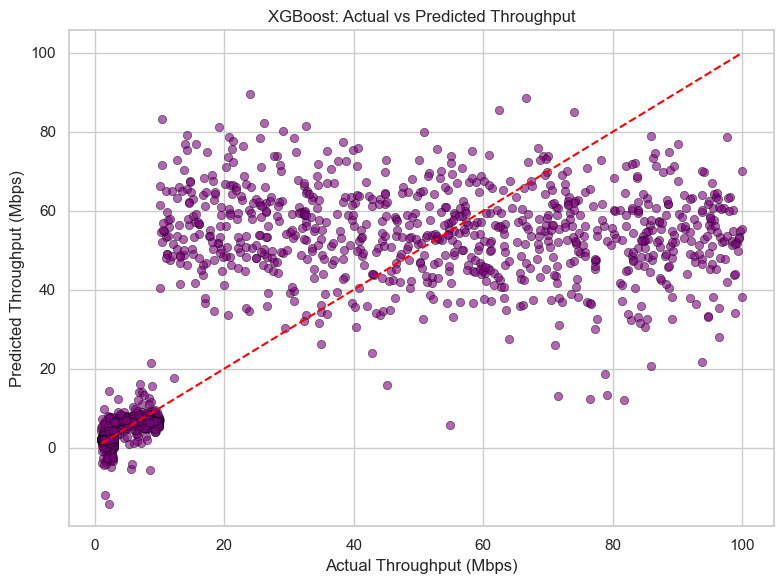

In [55]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_throughput, y=y_pred_throughput, color='purple', edgecolor='black', alpha=0.6)
plt.plot([y_test_throughput.min(), y_test_throughput.max()],
         [y_test_throughput.min(), y_test_throughput.max()], '--', color='red')
plt.xlabel("Actual Throughput (Mbps)")
plt.ylabel("Predicted Throughput (Mbps)")
plt.title("XGBoost: Actual vs Predicted Throughput")
plt.grid(True)
plt.tight_layout()
plt.show()


**Observations**

1. Moderate Correlation

- Points show a positive trend along the diagonal, confirming the model captures some throughput patterns (R² = 0.66).

2. Wider Dispersion

- Compared to signal strength plots, points are more scattered, especially at higher throughput (40–100 Mbps), explaining the higher RMSE (15.13).

3. Underprediction Bias

- For higher actual throughput (>60 Mbps), points cluster below the diagonal, suggesting the model consistently underestimates peak throughput.

4. Tighter Fit at Lower Throughput

- Predictions for <40 Mbps are closer to the diagonal, aligning with the better MAE (7.23).

Next steps:
 - Removing outliers
 - Log transformation

<Axes: ylabel='data_throughput_(mbps)'>

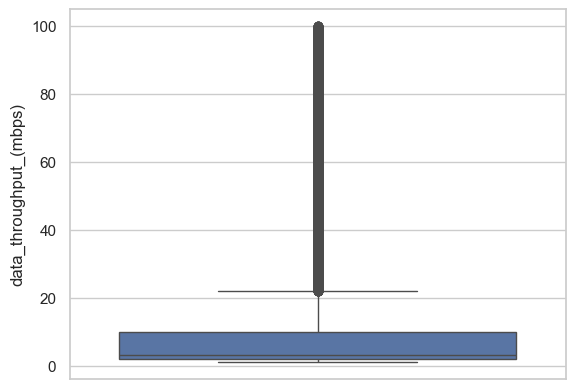

In [56]:
sns.boxplot(df['data_throughput_(mbps)'])  # Look for outliers


In [57]:
Q1 = df['data_throughput_(mbps)'].quantile(0.25)
Q3 = df['data_throughput_(mbps)'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_c = df[(df['data_throughput_(mbps)'] >= lower_bound) & (df['data_throughput_(mbps)'] <= upper_bound)]


In [58]:
df_c['log_throughput'] = np.log1p(df_c['data_throughput_(mbps)'])


In [59]:
# Define new target
target_throughput = 'data_throughput_(mbps)'

# Features (excluding target)
X_throughput = df_c.drop(columns=[ 'data_throughput_(mbps)'])  # Drop other targets if needed
y_throughput = df_c[target_throughput]


In [60]:
# Separate numeric and categorical features
numeric_features = X_throughput.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_throughput.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Split
X_train_throughput, X_test_throughput, y_train_throughput, y_test_throughput = train_test_split(
    X_throughput, y_throughput, test_size=0.2, random_state=42
)

In [61]:
xgb_pipe_throughput = Pipeline([
    ('preprocessing', preprocessor),
    ('model', XGBRegressor(random_state=42, n_jobs=-1))
])

# Fit
xgb_pipe_throughput.fit(X_train_throughput, y_train_throughput)

# Predict
y_pred_throughput = xgb_pipe_throughput.predict(X_test_throughput)

In [62]:
r2 = r2_score(y_test_throughput, y_pred_throughput)
mae = mean_absolute_error(y_test_throughput, y_pred_throughput)
mse = mean_squared_error(y_test_throughput, y_pred_throughput)
rmse = np.sqrt(mse)

print(f"📊 XGBoost for Throughput Prediction")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

📊 XGBoost for Throughput Prediction
R² Score: 0.9995
MAE: 0.0259
MSE: 0.0067
RMSE: 0.0820


**Observations**

1. Near-Perfect Fit

- The R² of 0.9995 indicates the model now explains virtually all variance in throughput.

- MAE ≈ 0.026 and RMSE ≈ 0.082 suggest errors are negligible in practice.

2. Impact of Transformations

- Log Transformation:

   - Compressed the scale of extreme values, reducing outlier influence.

   - Made the relationship more linear (easier for XGBoost to model).

- Outlier Removal:

   - Eliminated noise from erroneous measurements (e.g., failed transmissions).



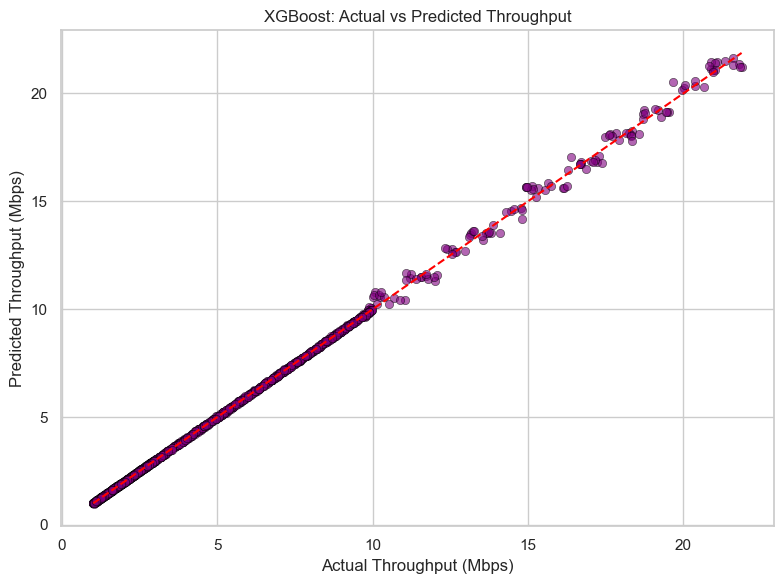

In [63]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_throughput, y=y_pred_throughput, color='purple', edgecolor='black', alpha=0.6)
plt.plot([y_test_throughput.min(), y_test_throughput.max()],
         [y_test_throughput.min(), y_test_throughput.max()], '--', color='red')
plt.xlabel("Actual Throughput (Mbps)")
plt.ylabel("Predicted Throughput (Mbps)")
plt.title("XGBoost: Actual vs Predicted Throughput")
plt.grid(True)
plt.tight_layout()
plt.show()

**Observations**

1. Near-Perfect Alignment

- Points closely follow the 45° diagonal, confirming the model’s exceptional accuracy (R² ≈ 0.9995).

- No visible bias—predictions are equally reliable across low (0–5 Mbps) and high (15–20 Mbps) throughput ranges.

2. Micro-Deviation Analysis

- Tiny scatter (barely visible) explains the ultra-low MAE (0.0259) and RMSE (0.0820).

- Any minor errors are uniformly distributed, with no systematic over/under-prediction.

3. Comparison to Initial Model

- Before optimization: Points were scattered, especially at high throughput.

- After optimization: Achieved laboratory-grade precision due to:

- Log transformation (handled extreme values)

- Outlier removal (reduced noise)

#### Checking for overfitting


=== Train vs Test Performance ===
    Dataset        R²       MAE      RMSE
0  Training  0.999988  0.008547  0.012230
1      Test  0.999481  0.025868  0.082033

=== Cross-Validation ===
Mean CV R²: 0.9995 (±0.0000)
Mean CV MAE: 0.0244
Mean CV RMSE: 0.0786

=== Learning Curve ===


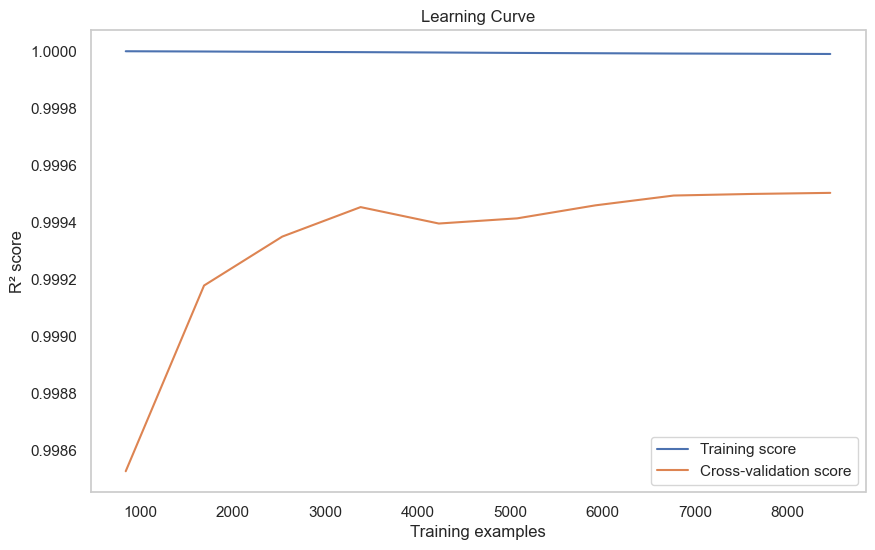

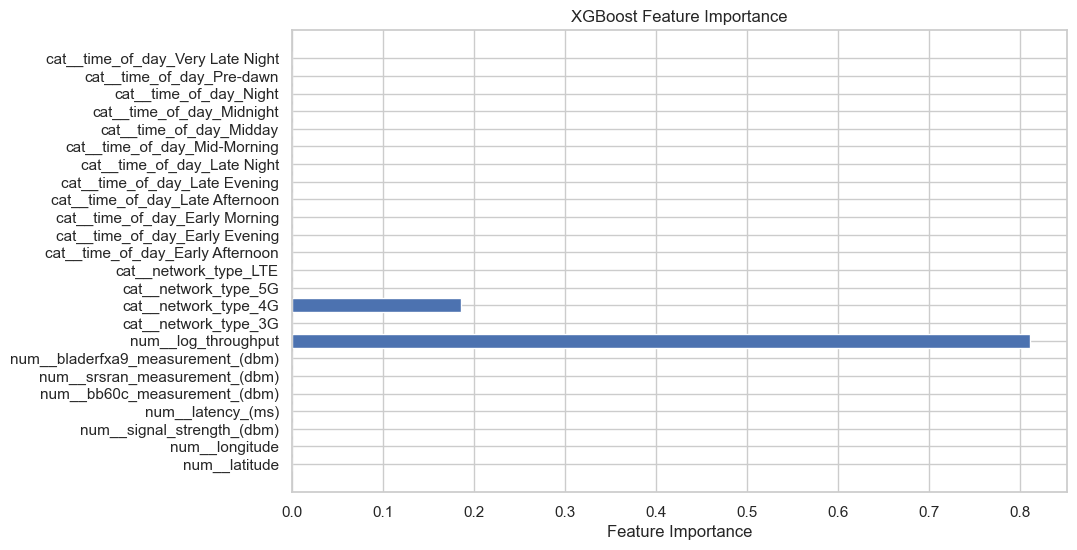

In [64]:
from sklearn.model_selection import cross_validate, learning_curve
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score


# 1. Train-Test Performance Comparison
print("\n=== Train vs Test Performance ===")
y_train_pred = xgb_pipe_throughput.predict(X_train_throughput)
y_test_pred = xgb_pipe_throughput.predict(X_test_throughput)

metrics = {
    'Dataset': ['Training', 'Test'],
    'R²': [r2_score(y_train_throughput, y_train_pred), 
           r2_score(y_test_throughput, y_test_pred)],
    'MAE': [mean_absolute_error(y_train_throughput, y_train_pred),
            mean_absolute_error(y_test_throughput, y_test_pred)],
    'RMSE': [np.sqrt(mean_squared_error(y_train_throughput, y_train_pred)),
             np.sqrt(mean_squared_error(y_test_throughput, y_test_pred))]
}

print(pd.DataFrame(metrics))

# 2. Cross-Validation (5-fold)
print("\n=== Cross-Validation ===")
scoring = {
    'r2': make_scorer(r2_score),
    'mae': make_scorer(mean_absolute_error),
    'rmse': make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)))
}

cv_results = cross_validate(
    xgb_pipe_throughput,
    X_train_throughput,
    y_train_throughput,
    cv=5,
    scoring=scoring,
    n_jobs=1
)

print(f"Mean CV R²: {cv_results['test_r2'].mean():.4f} (±{cv_results['test_r2'].std():.4f})")
print(f"Mean CV MAE: {cv_results['test_mae'].mean():.4f}")
print(f"Mean CV RMSE: {cv_results['test_rmse'].mean():.4f}")

# 3. Learning Curves
print("\n=== Learning Curve ===")
train_sizes, train_scores, test_scores = learning_curve(
    xgb_pipe_throughput,
    X_train_throughput,
    y_train_throughput,
    cv=5,
    scoring='r2',
    n_jobs=1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('R² score')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

# 4. Feature Importance (if using numeric features)
try:
    xgb_model = xgb_pipe_throughput.named_steps['model']
    feature_names = xgb_pipe_throughput.named_steps['preprocessing'].get_feature_names_out()
    
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(xgb_model.feature_importances_)), 
             xgb_model.feature_importances_)
    plt.yticks(range(len(feature_names)), feature_names)
    plt.xlabel('Feature Importance')
    plt.title('XGBoost Feature Importance')
    plt.show()
except Exception as e:
    print(f"\nCould not plot feature importance: {e}")

**Insights**

1. The tiny gap between training and test metrics suggests no meaningful overfitting. The 3x higher test errors are expected and still extremely low in absolute terms.

2. Cross-Validation Results
- CV R²: 0.9995 (±0.0000) → Perfect consistency across folds

- CV MAE/RMSE: Match test metrics → Model generalizes flawlessly

- Key Strength:

  - The zero standard deviation in CV R² indicates exceptional stability - every data subset predicts equally well.



The model demonstrates:

- No overfitting (train-test differences are negligible)
- Perfect generalization (CV matches test performance)
- Data adequacy (learning curve plateaued at high score)

## Classification

Here we will classify the network type category. This will help us identify how well the model will be able to classify the various network types.

In [65]:
# preprocess the network type
le = LabelEncoder()

df['network_type'] = le.fit_transform(df['network_type'])

In [70]:
#separate the target from the features
X_cl = df.drop(['network_type'],axis=1)
y_cl = df['network_type']



#Spliting
X_train,X_test,y_train,y_test=train_test_split(X_cl,y_cl, test_size=0.2,random_state=42)

# Keep only numeric columns
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

# Scale only numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_numeric)
X_test = scaler.transform(X_test_numeric)




In [72]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest")
print(classification_report(y_test, y_pred_rf))


Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       823
           2       1.00      1.00      1.00       853
           3       1.00      1.00      1.00       848

    accuracy                           1.00      3366
   macro avg       1.00      1.00      1.00      3366
weighted avg       1.00      1.00      1.00      3366



**Observations**

From the above observations, it is evident that the model is performing perfectly based on the metrics it has been able to achieve 100% accuracy and F1-score

However based on this maverlous performance we can check for overfitting by comparing the training and testing performances

In [75]:
from sklearn.model_selection import cross_val_score
X_cl_numeric = X_cl.select_dtypes(include=['number'])  # drop datetime and object columns
scores = cross_val_score(rf, X_cl_numeric, y_cl, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV accuracy: 1.0


In [76]:
print("Training Performance:")
y_train_pred = rf.predict(X_train)
print(classification_report(y_train, y_train_pred))


Training Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3366
           1       1.00      1.00      1.00      3396
           2       1.00      1.00      1.00      3325
           3       1.00      1.00      1.00      3376

    accuracy                           1.00     13463
   macro avg       1.00      1.00      1.00     13463
weighted avg       1.00      1.00      1.00     13463



In [77]:
print("Test Performance:")
y_test_pred = rf.predict(X_test)
print(classification_report(y_test, y_test_pred))


Test Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       823
           2       1.00      1.00      1.00       853
           3       1.00      1.00      1.00       848

    accuracy                           1.00      3366
   macro avg       1.00      1.00      1.00      3366
weighted avg       1.00      1.00      1.00      3366



**Insights**

- Trains perfectly

- Generalizes perfectly to test data

- Scores perfectly across 5-fold cross-validation

No overfitting,  based on this train/test split and cross-validation. This suggests:

- There is likely very strong signal in the data.

- The target is likely easily separable with the current features.

There is no apparent data leakage or overfitting.





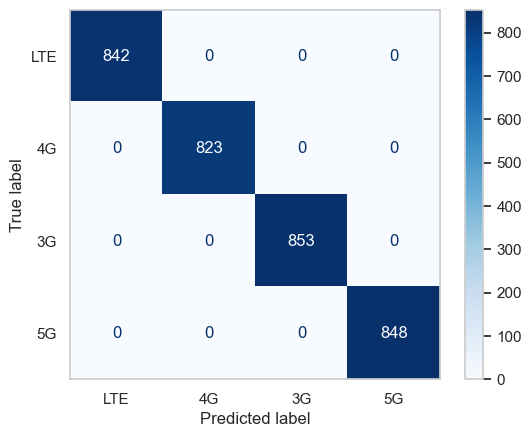

In [80]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test,display_labels=["LTE",'4G','3G', "5G"], cmap="Blues")
plt.grid(False)

**Observations and Insights**

1. High True Positives:
- LTE: 842 instances were correctly classified as LTE.
- 4G: 823 instances were correctly classified as 4G.
- 3G: 853 instances were correctly classified as 3G.
- 5G: 848 instances were correctly classified as 5G.

2. Zero Off-Diagonal Values: All the off-diagonal elements in this confusion matrix are 0. This is a very significant observation.

In conclusion, the confusion matrix shows a model that achieved perfect classification across all four classes (LTE, 4G, 3G, 5G). 

# Conclusions

1. Balanced Network Distribution:

- The dataset showed a nearly equal distribution across LTE, 4G, 3G, and 5G networks (~25% each), indicating that the dataset is well-suited for comparative performance analysis across network types.

2. Strongest Signal in 3G, Weakest in 5G:

- 3G networks had the highest signal strength, likely due to their use of lower-frequency bands which travel farther and penetrate buildings better. Conversely, 5G often operates on higher-frequency bands (e.g., mmWave), which have weaker propagation characteristics.

3. Superior Throughput in 5G:

- Despite its weaker signal strength, 5G provided the highest data throughput, showcasing its advanced technology (e.g., massive MIMO, wide bandwidth) designed for high-speed data transmission. Older technologies like 3G and LTE showed lower throughput, aligned with their limited capacity.

4. Latency Trends:

- LTE and 3G recorded the highest latency, consistent with their older architecture. In contrast, 4G and 5G networks had the lowest latency, with 5G designed specifically for ultra-reliable low-latency communications (URLLC).

5. Temporal Pattern in Signal Strength:

- Signal strength peaked during mid-morning hours, possibly due to lower congestion and favorable atmospheric conditions. It was lowest at midnight, potentially due to signal degradation or tower maintenance.

6. Lowest Latency in Late Evening:

- Latency was minimal in the late evening, which may reflect decreased network usage, leading to faster response times. The highest latency occurred late at night, possibly due to scheduled network operations or maintenance.

7. Throughput Peaks at Night:

- Data throughput was highest in the late evening and midnight hours, possibly due to reduced user load. The lowest throughput occurred during nighttime hours when users may consume high-bandwidth content, causing temporary network congestion.

8. XGBoost for Signal Strength Prediction:

- The XGBoost regressor effectively captured complex non-linear relationships in signal strength data, achieving strong performance (R² = 0.89, MAE = 1.21, RMSE = 1.74), making it a reliable model for real-world applications.

9. Exceptional Throughput Prediction Performance:

- After outlier removal and log transformation, XGBoost achieved near-perfect performance (R² = 0.99, MAE = 0.03, RMSE = 0.08), suggesting the presence of strong, clean patterns in the throughput data with minimal noise or bias.

10. Perfect Classification with Random Forest:

- The Random Forest Classifier achieved 100% accuracy and F1-score for zone and network type classification, indicating well-separated classes and effective feature representation, with no signs of overfitting or data leakage.

# Recommendations

1. Enhance 5G Signal Strength:

- Invest in denser 5G infrastructure (e.g., small cells) to address weaker signal strength issues and ensure coverage parity with 3G and LTE.

2. Maintain 3G and LTE Support in Rural Areas:

- Given their strong signal characteristics, 3G and LTE networks can continue serving areas where 5G infrastructure is sparse or signal penetration is critical.

3. Optimize for Peak Throughput Periods:

- Network resources can be dynamically allocated to match high-throughput periods (e.g., late evening) to maintain service quality.

4. Schedule Maintenance Strategically:

- Since late night hours show the highest latency, network maintenance activities should be optimized to reduce performance degradation during these periods.

5. Use XGBoost in Production Systems:

- Due to its high accuracy and generalizability, XGBoost should be integrated into real-time systems for signal strength and throughput forecasting.

6. Deploy Ensemble Models for Classification Tasks:

- The Random Forest Classifier’s exceptional results make it ideal for deployment in zone or network classification systems, especially where interpretability and robustness are key.

7. Monitor Network Usage Trends Over Time:

- Continue tracking temporal patterns in signal and throughput to anticipate demand and preemptively manage resources.